# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import math

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
#Code:
DFSAT2017 = pd.read_csv('../data/sat_2017.csv')
DFACT2017 = pd.read_csv('../data/act_2017.csv')



#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code:
DFACT2017.head()


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [5]:
DFSAT2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [6]:
DFSAT2017.sort_values('Participation', ascending = False)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
29,New Hampshire,96%,532,520,1052
19,Maine,95%,513,499,1012
12,Idaho,93%,513,493,1005
13,Illinois,9%,559,556,1115
9,Florida,83%,520,497,1017
21,Massachusetts,76%,555,551,1107
39,Rhode Island,71%,539,524,1062
30,New Jersey,70%,530,526,1056
36,Oklahoma,7%,530,517,1047
20,Maryland,69%,536,52,1060


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The SAT and ACT Dataframes respectively describe the participation rates and average scores on each section, as well as averages of people's total and composite scores (respectively), for class of 2017 High School students in each state, as well as the District of Columbia, in the USA.  

#### 4a. Does the data look complete? 

Answer: Yes, there are no missing values, and all 50 states plus the District of Columbia are included. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:
SAT Minimum and Maximum values - For Reading & Writing 200-800, For Math 200-800, For Total Score = 400-1600 (sum of both sections)
ACT Minimum and Maximum values - For English = 1-36, For Math 1-36, For Reading 1-36, For Science 1-36, For Total Score 1-36 (composite or mean of all 4 sections, rounded to nearest whole integer) 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [7]:
DFSAT2017['Math'].iloc[20]

52

In [8]:
#code
DFACT2017['Composite'] = DFACT2017['Composite'].map(lambda _: _.replace('x', '')) #extra character
DFSAT2017['Math'].iloc[20] = 524 #1060 total - 536 from reading section = 524 in the math section ...curious why this "caveats warning" is triggered.

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### 5. What are your data types? 
Display the data types of each feature. 

In [9]:
DFSAT2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [10]:
DFACT2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The variable Participation in both Dataframes as well as Composite in the ACT Dataframe should be float64, so they can be manipulated and sorted as numbers.  

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
def object_to_integer(column):
    column = column.map(lambda column: column.replace('%', '')).astype(float).map(lambda column: column/100)
    column.astype(float)
    return(column)


In [12]:
DFACT2017['Participation'] = object_to_integer(DFACT2017['Participation'])

In [13]:
DFSAT2017['Participation'] = object_to_integer(DFSAT2017['Participation'])


In [14]:
DFACT2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [15]:
DFSAT2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [16]:
DFACT2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [17]:
DFSAT2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


- Fix any individual values preventing other columns from being the appropriate type.

In [18]:
#code 
DFACT2017['Composite'] = pd.to_numeric(DFACT2017['Composite']) 

- Finish your data modifications by making sure the columns are now typed appropriately.

In [19]:
#code
DFACT2017
DFACT2017['State'] = DFACT2017['State'].astype(str)
DFSAT2017['State'] = DFSAT2017['State'].astype(str)

- Display the data types again to confirm they are correct.

In [20]:
#Code: #REWRITE EACH DF SEPARATELY FIRST.... Df.merge may have solutions?  Credz to Tom Ludlow for the real solution UDAREAL MVP TOM 
pd.merge(DFSAT2017, DFACT2017, on='State')

dftestscores2017 = pd.merge(DFSAT2017, DFACT2017, on='State')

#df.merg
#pd.concat([DFSAT2017, DFACT2017], axis = 1) nahhh merge is better

In [21]:
dftestscores2017.head()

,State,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [22]:
#code
NewDFDict = {'State' : 'state',
             'Participation_x' : 'sat2017participation',
             'Evidence-Based Reading and Writing' : 'sat2017reading_and_writing',
             'Math_x' : 'sat2017math',
             'Total' : 'sat2017total',
             'Participation_y' : 'act2017participation',
             'English' : 'act2017english',
             'Math_y' : 'act2017math',
             'Reading' : 'act2017reading',
             'Science' : 'act2017science',
             'Composite' : 'act2017composite'}
dftestscores2017.rename(columns=NewDFDict, inplace=True)

In [23]:
dftestscores2017

,state,sat2017participation,sat2017reading_and_writing,sat2017math,sat2017total,act2017participation,act2017english,act2017math,act2017reading,act2017science,act2017composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8


In [24]:
dftestscores2017.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
state                         51 non-null object
sat2017participation          51 non-null float64
sat2017reading_and_writing    51 non-null int64
sat2017math                   51 non-null int64
sat2017total                  51 non-null int64
act2017participation          51 non-null float64
act2017english                51 non-null float64
act2017math                   51 non-null float64
act2017reading                51 non-null float64
act2017science                51 non-null float64
act2017composite              51 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|dftestscores2017|The states within the USA plus the District of Columbia (51 objects)|
|**sat2017participation**|*float*|dftestscores2017|Participation rate for the SAT in 2017,  within the population of eligible public school students, per state, as a percentile from 0 to 1 with 1 being 100% participation|
|**sat2017reading_and_writing**|*integer*|dftestscores2017|Average performance on the SAT reading and writing sections in 2017, per state
|**sat2017math**|*integer*|dftestscores2017|Average performance on the SAT math sections, in 2017, per state
|**sat2017total**|*integer*|dftestscores2017|Average performance on the SAT, combining the reading and writing section score with the math section score, in 2017, per state
|**act2017participation**|*float*|dftestscores2017|Participation rate for the ACT in 2017, within the population of eligible public school students, per state, as a percentile from 0 to 1 with 1 being 100% participation|
|**act2017english**|*float*|dftestscores2017|Average performance on the ACT english section, in 2017, per state|
**act2017math**|*float*|dftestscores2017|Average performance on the ACT math section, in 2017, per state|
**act2017reading**|*float*|dftestscores2017|Average performance on the ACT reading section, in 2017, per state|
**act2017science**|*float*|dftestscores2017|Average performance on the ACT science section, in 2017, per state|
**act2017composite**|*float*|dftestscores2017|Average performance on the ACT, summing all four sections, then dividing by four to arrive at the average.|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [25]:
#done in box [20]

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [26]:
#Ended up writing this above, my bad for jumbling things up!
#Code: #REWRITE EACH DF SEPARATELY FIRST.... Df.merge may have solutions?  Credz to Tom Ludlow for pointing me to the real solution UDAREAL MVP TOM 

#df.merg
#pd.concat([DFSAT2017, DFACT2017], axis = 1) nahhh merge is better, done in box [20]

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [27]:
#code

dftestscores2017.to_csv('../data/dftestscores2017.csv') 

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [28]:
DFSAT2018 = pd.read_csv('../data/sat_2018.csv')
DFACT2018 = pd.read_csv('../data/act_2018.csv')

In [29]:
DFSAT2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [30]:
DFACT2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [31]:
dftestscores2018 = pd.merge(DFSAT2018, DFACT2018, on='State') #merging on the common 'State ' for one dataframe of 2018 results


In [32]:
dftestscores2018['Participation_x'] = object_to_integer(dftestscores2018['Participation_x']) #removing %'s from ratio of participation for 2018 responses'
dftestscores2018['Participation_y'] = object_to_integer(dftestscores2018['Participation_y']) 


In [33]:
dftestscores2018 = dftestscores2018.drop([19])

In [34]:
dftestscores2018.head(10)

,State,Participation_x,Evidence-Based Reading and Writing,Math,Total,Participation_y,Composite
0,Alabama,0.06,595,571,1166,1.00,19.1
1,Alaska,0.43,562,544,1106,0.33,20.8
2,Arizona,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4
4,California,0.60,540,536,1076,0.27,22.7
5,Colorado,1.00,519,506,1025,0.30,23.9
6,Connecticut,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,505,492,998,0.17,23.8
8,Florida,0.56,550,549,1099,0.66,19.9
9,Georgia,0.70,542,522,1064,0.53,21.4


In [35]:
#DFACT2018['Participation'] = object_to_integer(DFACT2018['Participation'])
#DFSAT2018['Participation'] = object_to_integer(DFSAT2018['Participation']) #changing objects to integers to be able to measure and manipulate

In [36]:
new_df_dict_2018 = {'State' : 'state', #changing the dictionaries to be in sync with the 2017 data and combine it all into one DF 
             'Participation_x' : 'sat2018participation',
             'Evidence-Based Reading and Writing' : 'sat2018reading_and_writing',
             'Math' : 'sat2018math',
             'Total' : 'sat2018total',
             'Participation_y' : 'act2018participation',
             'Composite' : 'act2018composite'}
dftestscores2018.rename(columns=new_df_dict_2018, inplace=True)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [37]:
df_test_scores_2017_2018 = pd.merge(dftestscores2017, dftestscores2018) #merging on the common 'State ' for one dataframe of 2018 results


In [38]:
df_test_scores_2017_2018.head()


,state,sat2017participation,sat2017reading_and_writing,sat2017math,sat2017total,act2017participation,act2017english,act2017math,act2017reading,act2017science,act2017composite,sat2018participation,sat2018reading_and_writing,sat2018math,sat2018total,act2018participation,act2018composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7


In [39]:
df_test_scores_2017_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 17 columns):
state                         50 non-null object
sat2017participation          50 non-null float64
sat2017reading_and_writing    50 non-null int64
sat2017math                   50 non-null int64
sat2017total                  50 non-null int64
act2017participation          50 non-null float64
act2017english                50 non-null float64
act2017math                   50 non-null float64
act2017reading                50 non-null float64
act2017science                50 non-null float64
act2017composite              50 non-null float64
sat2018participation          50 non-null float64
sat2018reading_and_writing    50 non-null int64
sat2018math                   50 non-null int64
sat2018total                  50 non-null int64
act2018participation          50 non-null float64
act2018composite              50 non-null float64
dtypes: float64(10), int64(6), object(1)
memory usage: 7.0+ 

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [40]:
#Code:
df_test_scores_2017_2018.describe()

,sat2017participation,sat2017reading_and_writing,sat2017math,sat2017total,act2017participation,act2017english,act2017math,act2017reading,act2017science,act2017composite,sat2018participation,sat2018reading_and_writing,sat2018math,sat2018total,act2018participation,act2018composite
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.386000,570.860000,558.660000,1129.620000,0.659200,20.862000,21.13600,21.956000,20.992000,21.466000,0.448200,565.020000,557.760000,1122.880000,0.623200,21.454000
std,0.345602,44.385146,45.839832,89.913085,0.321107,2.324307,1.97399,2.046317,3.195139,2.004241,0.370976,47.010416,46.987432,92.845634,0.341141,2.111312
min,0.020000,503.000000,492.000000,996.000000,0.080000,16.300000,18.00000,18.100000,2.300000,17.800000,0.020000,480.000000,486.000000,998.000000,0.070000,17.700000
25%,0.040000,535.250000,524.000000,1057.000000,0.310000,19.000000,19.40000,20.425000,19.900000,19.800000,0.042500,535.000000,524.250000,1062.250000,0.277500,19.925000
50%,0.340000,559.500000,549.500000,1107.500000,0.710000,20.550000,20.90000,21.700000,21.100000,21.400000,0.500000,552.000000,545.500000,1098.500000,0.660000,21.050000
75%,0.650000,613.500000,601.000000,1214.000000,1.000000,23.100000,23.00000,23.875000,22.275000,23.400000,0.745000,612.750000,594.250000,1207.000000,1.000000,23.650000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.30000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [41]:
#code
from math import sqrt

#def std_dev(data):
#    standard_deviation: []
#for d in data:
#        sqrt((1/(d)*(sum(d)*(d- math.mean(sum(d)**2))))
#        return(std_dev)
    #Thanks Jacob for the reminder that breaking down the steps always makes a problem way less intimidating!
    
def mean(data):
    return sum(data) / len(data)

def variance(data):
    mu = mean(data)
    return mean([(x - mu) ** 2 for x in data])

def std_dev(data):
    return sqrt(variance(data))

std_dev(df_test_scores_2017_2018['act2018composite'])

2.090091864009809

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [42]:
#Code: 
sd_dict = {col: std_dev(df_test_scores_2017_2018[col]) for col in df_test_scores_2017_2018 if col != 'state'}
sd_dict

{'sat2017participation': 0.3421286307808805,
 'sat2017reading_and_writing': 43.9390532442382,
 'sat2017math': 45.37911854586864,
 'sat2017total': 89.00941298536914,
 'act2017participation': 0.3178794740149165,
 'act2017english': 2.3009467616613812,
 'act2017math': 1.9541504548012678,
 'act2017reading': 2.025750231395766,
 'act2017science': 3.1630263988781375,
 'act2017composite': 1.9840977798485642,
 'sat2018participation': 0.36724754594142633,
 'sat2018reading_and_writing': 46.537937212558106,
 'sat2018math': 46.51518461749884,
 'sat2018total': 91.91248881408882,
 'act2018participation': 0.33771254048376703,
 'act2018composite': 2.090091864009809}

In [43]:
np.std(df_test_scores_2017_2018)

sat2017participation           0.342129
sat2017reading_and_writing    43.939053
sat2017math                   45.379119
sat2017total                  89.009413
act2017participation           0.317879
act2017english                 2.300947
act2017math                    1.954150
act2017reading                 2.025750
act2017science                 3.163026
act2017composite               1.984098
sat2018participation           0.367248
sat2018reading_and_writing    46.537937
sat2018math                   46.515185
sat2018total                  91.912489
act2018participation           0.337713
act2018composite               2.090092
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?


Answer - My function provides less rounded outputs in line the the numpy std method; both of these functions provide standard deviations that are slightly lower in value than the pandas describe method - this may be a result of the divisor on the righthand side of the function being n-1 in the describe method, whereas in my manual calculation and the numpy method, the divisor is simply n.  n-1 is typical of sampling standard deviations, whereas n is typical for population's standard deviations.  

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

**100% PARTICIPATION RATES FOR SAT**

In [164]:
masksat2017participation = (df_test_scores_2017_2018['sat2017participation'] == 1.0) 
df_test_scores_2017_2018[masksat2017participation]

,state,sat2017participation,sat2017reading_and_writing,sat2017math,sat2017total,act2017participation,act2017english,act2017math,act2017reading,act2017science,act2017composite,sat2018participation,sat2018reading_and_writing,sat2018math,sat2018total,act2018participation,act2018composite
6,Connecticut,1.0,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.0,535,519,1053,0.26,25.6
7,Delaware,1.0,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.0,505,492,998,0.17,23.8
21,Michigan,1.0,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.0,511,499,1011,0.22,24.2


In [168]:
masksat2018participation = (df_test_scores_2017_2018['sat2018participation'] == 1.0)
df_test_scores_2017_2018[masksat2018participation]


,state,sat2017participation,sat2017reading_and_writing,sat2017math,sat2017total,act2017participation,act2017english,act2017math,act2017reading,act2017science,act2017composite,sat2018participation,sat2018reading_and_writing,sat2018math,sat2018total,act2018participation,act2018composite
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,1.0,519,506,1025,0.30,23.9
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.0,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.0,505,492,998,0.17,23.8
11,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3,1.0,508,493,1001,0.36,22.3
21,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.0,511,499,1011,0.22,24.2


Colorado and Idaho go from partial to total sat participation, from 2017 to 2018. 

In [169]:
maskact2017participation =  (df_test_scores_2017_2018['act2017participation'] == 1.0)
df_test_scores_2017_2018[maskact2017participation].

,state,sat2017participation,sat2017reading_and_writing,sat2017math,sat2017total,act2017participation,act2017english,act2017math,act2017reading,act2017science,act2017composite,sat2018participation,sat2018reading_and_writing,sat2018math,sat2018total,act2018participation,act2018composite
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
3,Arkansas,0.03,614,594,1208,1.0,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
5,Colorado,0.11,606,595,1201,1.0,20.1,20.3,21.2,20.9,20.8,1.00,519,506,1025,0.30,23.9
16,Kentucky,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,20.0,0.04,630,618,1248,1.00,20.2
17,Louisiana,0.04,611,586,1198,1.0,19.4,18.8,19.8,19.6,19.5,0.04,615,595,1210,1.00,19.2
22,Minnesota,0.03,644,651,1295,1.0,20.4,21.5,21.8,21.6,21.5,0.04,643,655,1298,0.99,21.3
23,Mississippi,0.02,634,607,1242,1.0,18.2,18.1,18.8,18.8,18.6,0.03,630,606,1236,1.00,18.6
24,Missouri,0.03,640,631,1271,1.0,19.8,19.9,20.8,20.5,20.4,0.04,633,629,1262,1.00,20.0
25,Montana,0.10,605,591,1196,1.0,19.0,20.2,21.0,20.5,20.3,0.10,606,592,1198,1.00,20.0
27,Nevada,0.26,563,553,1116,1.0,16.3,18.0,18.1,18.2,17.8,0.23,574,566,1140,1.00,17.7


In [171]:
maskact2018participation =  (df_test_scores_2017_2018['act2018participation'] == 1.0)
df_test_scores_2017_2018[maskact2018participation]

,state,sat2017participation,sat2017reading_and_writing,sat2017math,sat2017total,act2017participation,act2017english,act2017math,act2017reading,act2017science,act2017composite,sat2018participation,sat2018reading_and_writing,sat2018math,sat2018total,act2018participation,act2018composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.0,19.1
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.0,19.4
16,Kentucky,0.04,631,616,1247,1.00,19.6,19.4,20.5,20.1,20.0,0.04,630,618,1248,1.0,20.2
17,Louisiana,0.04,611,586,1198,1.00,19.4,18.8,19.8,19.6,19.5,0.04,615,595,1210,1.0,19.2
23,Mississippi,0.02,634,607,1242,1.00,18.2,18.1,18.8,18.8,18.6,0.03,630,606,1236,1.0,18.6
24,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,20.4,0.04,633,629,1262,1.0,20.0
25,Montana,0.10,605,591,1196,1.00,19.0,20.2,21.0,20.5,20.3,0.10,606,592,1198,1.0,20.0
26,Nebraska,0.03,629,625,1253,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,623,1252,1.0,20.1
27,Nevada,0.26,563,553,1116,1.00,16.3,18.0,18.1,18.2,17.8,0.23,574,566,1140,1.0,17.7
32,North Carolina,0.49,546,535,1081,1.00,17.8,19.3,19.6,19.3,19.1,0.52,554,543,1098,1.0,19.1


Nebraska and Ohio went to a full mandate on the act from 2017 to 2018, and the reverse happened with Colorado, where a mandate was dropped, while the SAT was mandated instead, and ACT participation dropped to 30%.  Minnesota went from total participation to 99% participation in 2018. 

In [44]:
low5part_2017sat = df_test_scores_2017_2018.sat2017participation.sort_values(ascending = True).head()
low5part_2017sat
#df_test_scores_2017_2018.iloc[1:5].sort_values(['sat2017participation', ascending = True)
#df_test_scores_2017_2018.sat2017participation.sort_values(ascending = True).head()

33    0.02
23    0.02
14    0.02
24    0.03
43    0.03
Name: sat2017participation, dtype: float64

In [45]:
df_test_scores_2017_2018.sort_values(['sat2017participation'], ascending = True).iloc[[0, 1, 2, 3, 4], [0,1, 11]]

,state,sat2017participation,sat2018participation
33,North Dakota,0.02,0.02
23,Mississippi,0.02,0.03
14,Iowa,0.02,0.03
24,Missouri,0.03,0.04
43,Utah,0.03,0.04


In [46]:
low5part_2018sat = df_test_scores_2017_2018.sat2018participation.sort_values(ascending = True).head()
low5part_2018sat

33    0.02
49    0.03
40    0.03
26    0.03
48    0.03
Name: sat2018participation, dtype: float64

In [47]:
df_test_scores_2017_2018.sort_values(['sat2018participation'], ascending = True).iloc[[0, 1, 2, 3, 4], [0, 1, 11]]

,state,sat2017participation,sat2018participation
33,North Dakota,0.02,0.02
49,Wyoming,0.03,0.03
40,South Dakota,0.03,0.03
26,Nebraska,0.03,0.03
48,Wisconsin,0.03,0.03


looks like there was a large shift here from lowest participating sat scores - The only constant is North Dakota!

In [48]:
high5part_2017sat = df_test_scores_2017_2018.sat2017participation.sort_values(ascending = False).head()
high5part_2017sat

6     1.00
7     1.00
21    1.00
28    0.96
18    0.95
Name: sat2017participation, dtype: float64

In [49]:
df_test_scores_2017_2018.sort_values(['sat2017participation'], ascending = False).iloc[[0, 1, 2, 3, 4], [0, 1, 11]]

,state,sat2017participation,sat2018participation
21,Michigan,1.00,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
28,New Hampshire,0.96,0.96
18,Maine,0.95,0.99


In [50]:
high5part_2018sat = df_test_scores_2017_2018.sat2018participation.sort_values(ascending = False).head()
high5part_2018sat

11    1.0
5     1.0
6     1.0
7     1.0
21    1.0
Name: sat2018participation, dtype: float64

In [51]:
df_test_scores_2017_2018.sort_values(['sat2018participation'], ascending = False).iloc[[0, 1, 2, 3, 4], [0, 1, 11]]

,state,sat2017participation,sat2018participation
5,Colorado,0.11,1.0
6,Connecticut,1.00,1.0
7,Delaware,1.00,1.0
21,Michigan,1.00,1.0
11,Idaho,0.93,1.0


Colorado must have enstated a mandation contract for their students to take the SAT between these 2 years.  Idaho as well most likely, or better enforced an existing contract.  

**PARTICIPATION RATES FOR ACT**

In [52]:
low5part_2017act = df_test_scores_2017_2018.act2017participation.sort_values(ascending = True).head()
low5part_2017act

18    0.08
7     0.18
28    0.18
38    0.21
37    0.23
Name: act2017participation, dtype: float64

In [53]:
df_test_scores_2017_2018.sort_values(['act2017participation'], ascending = True).iloc[[0, 1, 2, 3, 4], [0, 5, -2]]

,state,act2017participation,act2018participation
18,Maine,0.08,0.07
7,Delaware,0.18,0.17
28,New Hampshire,0.18,0.16
38,Rhode Island,0.21,0.15
37,Pennsylvania,0.23,0.20


In [54]:
low5part_2018act = df_test_scores_2017_2018.act2018participation.sort_values(ascending = True).head()
low5part_2018act

18    0.07
38    0.15
28    0.16
7     0.17
37    0.20
Name: act2018participation, dtype: float64

In [55]:
df_test_scores_2017_2018.sort_values(['act2018participation'], ascending = True).iloc[[0, 1, 2, 3, 4], [0, 5, -2]]

,state,act2017participation,act2018participation
18,Maine,0.08,0.07
38,Rhode Island,0.21,0.15
28,New Hampshire,0.18,0.16
7,Delaware,0.18,0.17
37,Pennsylvania,0.23,0.20


The lowest participating states remained the same -  They all seem to have slightly less participation than the prior year.

In [56]:
high5part_2017act = df_test_scores_2017_2018.act2017participation.sort_values(ascending = False).head()
high5part_2017act

49    1.0
35    1.0
3     1.0
5     1.0
16    1.0
Name: act2017participation, dtype: float64

In [57]:
df_test_scores_2017_2018.sort_values(['act2017participation'], ascending = False).iloc[[0, 1, 2, 3, 4], [0, 5, -2]]

,state,act2017participation,act2018participation
0,Alabama,1.0,1.0
16,Kentucky,1.0,1.0
48,Wisconsin,1.0,1.0
43,Utah,1.0,1.0
41,Tennessee,1.0,1.0


In [58]:
high5part_2018act = df_test_scores_2017_2018.act2018participation.sort_values(ascending = False).head()
high5part_2018act

49    1.0
35    1.0
3     1.0
16    1.0
17    1.0
Name: act2018participation, dtype: float64

In [59]:
df_test_scores_2017_2018.sort_values(['act2018participation'], ascending = False).iloc[[0, 1, 2, 3, 4], [0, 5, -2]]

,state,act2017participation,act2018participation
0,Alabama,1.0,1.0
16,Kentucky,1.0,1.0
48,Wisconsin,1.0,1.0
43,Utah,1.0,1.0
41,Tennessee,1.0,1.0


Top participation remained the same - these states all appear to have state mandates for participation that were retained. 

**TOTAL SCORES FOR SAT**

In [60]:
low5tot_2017sat = df_test_scores_2017_2018.sat2017total.sort_values(ascending = True).head()
low5tot_2017sat


7      996
11    1005
21    1005
18    1012
8     1017
Name: sat2017total, dtype: int64

In [61]:
df_test_scores_2017_2018.sort_values(['sat2017total'], ascending = True).iloc[[0, 1, 2, 3, 4], [0, 4, -3]]

,state,sat2017total,sat2018total
7,Delaware,996,998
11,Idaho,1005,1001
21,Michigan,1005,1011
18,Maine,1012,1013
8,Florida,1017,1099


In [62]:
low5tot_2018sat = df_test_scores_2017_2018.sat2018total.sort_values(ascending = True).head()
low5tot_2018sat

7      998
47     999
11    1001
43    1010
10    1010
Name: sat2018total, dtype: int64

In [63]:
df_test_scores_2017_2018.sort_values(['sat2018total'], ascending = True).iloc[[0, 1, 2, 3, 4], [0, 4, -3]]

,state,sat2017total,sat2018total
7,Delaware,996,998
47,West Virginia,1086,999
11,Idaho,1005,1001
43,Utah,1238,1010
10,Hawaii,1085,1010


Delaware and Idaho remain similar, Utah sharply drops after an approximately 25% increase in their participation rate from .03 to .04, Hawaii also dips. 

In [66]:
high5tot_2017sat = df_test_scores_2017_2018.sat2017total.sort_values(ascending = False).head()
high5tot_2017sat

22    1295
48    1291
14    1275
24    1271
15    1260
Name: sat2017total, dtype: int64

In [68]:
df_test_scores_2017_2018.sort_values(['sat2017total'], ascending = False).iloc[[0, 1, 2, 3, 4], [0, 4, -3]]

,state,sat2017total,sat2018total
22,Minnesota,1295,1298
48,Wisconsin,1291,1294
14,Iowa,1275,1265
24,Missouri,1271,1262
15,Kansas,1260,1265


In [69]:
high5tot_2018sat = df_test_scores_2017_2018.sat2018total.sort_values(ascending = False).head()
high5tot_2018sat

22    1298
48    1294
33    1283
14    1265
15    1265
Name: sat2018total, dtype: int64

In [70]:
df_test_scores_2017_2018.sort_values(['sat2018total'], ascending = False).iloc[[0, 1, 2, 3, 4], [0, 4, -3]]

,state,sat2017total,sat2018total
22,Minnesota,1295,1298
48,Wisconsin,1291,1294
33,North Dakota,1256,1283
14,Iowa,1275,1265
15,Kansas,1260,1265


Minnesota Wisconsin Kansas and Iowa remain similar, North Dakota ranks a little higher while Missouri ranks slightly lower. 

**COMPOSITES FOR ACT**

In [73]:
low5tot_2017act = df_test_scores_2017_2018.act2017composite.sort_values(ascending = True).head()
low5tot_2017act

27    17.8
23    18.6
39    18.7
10    19.0
32    19.1
Name: act2017composite, dtype: float64

In [75]:
df_test_scores_2017_2018.sort_values(['act2017composite'], ascending = True).iloc[[0, 1, 2, 3, 4], [0, 10, -1]]

,state,act2017composite,act2018composite
27,Nevada,17.8,17.7
23,Mississippi,18.6,18.6
39,South Carolina,18.7,18.3
10,Hawaii,19.0,18.9
32,North Carolina,19.1,19.1


In [77]:
low5tot_2018act = df_test_scores_2017_2018.act2018composite.sort_values(ascending = True).head()
low5tot_2018act

27    17.7
39    18.3
23    18.6
10    18.9
0     19.1
Name: act2018composite, dtype: float64

In [78]:
df_test_scores_2017_2018.sort_values(['act2018composite'], ascending = True).iloc[[0, 1, 2, 3, 4], [0, 10, -1]]

,state,act2017composite,act2018composite
27,Nevada,17.8,17.7
39,South Carolina,18.7,18.3
23,Mississippi,18.6,18.6
10,Hawaii,19.0,18.9
0,Alabama,19.2,19.1


Nevada, South Carolina, Mississippi and Hawaii remain similar, Alabama scores slightly lower than North Carolina. South Carolina had the worst dip.

In [80]:
high5tot_2017act = df_test_scores_2017_2018.act2017composite.sort_values(ascending = False).head()
high5tot_2017act 

28    25.5
20    25.4
6     25.2
18    24.3
31    24.2
Name: act2017composite, dtype: float64

In [81]:
df_test_scores_2017_2018.sort_values(['act2017composite'], ascending = False).iloc[[0, 1, 2, 3, 4], [0, 10, -1]]

,state,act2017composite,act2018composite
28,New Hampshire,25.5,25.1
20,Massachusetts,25.4,25.5
6,Connecticut,25.2,25.6
18,Maine,24.3,24.0
31,New York,24.2,24.5


In [82]:
high5tot_2018act = df_test_scores_2017_2018.act2018composite.sort_values(ascending = False).head()
high5tot_2018act 

6     25.6
20    25.5
28    25.1
31    24.5
21    24.2
Name: act2018composite, dtype: float64

In [83]:
df_test_scores_2017_2018.sort_values(['act2018composite'], ascending = False).iloc[[0, 1, 2, 3, 4], [0, 10, -1]]

,state,act2017composite,act2018composite
6,Connecticut,25.2,25.6
20,Massachusetts,25.4,25.5
28,New Hampshire,25.5,25.1
31,New York,24.2,24.5
21,Michigan,24.1,24.2


New Hampshire, Connecticut, Massachusetts, and New York remained in the top 5, while Maine left the board in 2017 and was replaced by Michigan. 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

In [84]:
df_test_scores_2017_2018.corr()

,sat2017participation,sat2017reading_and_writing,sat2017math,sat2017total,act2017participation,act2017english,act2017math,act2017reading,act2017science,act2017composite,sat2018participation,sat2018reading_and_writing,sat2018math,sat2018total,act2018participation,act2018composite
sat2017participation,1.000000,-0.865797,-0.845226,-0.858530,-0.839471,0.670369,0.700665,0.691050,0.229955,0.681073,0.871233,-0.649840,-0.668621,-0.667212,-0.791382,0.635531
sat2017reading_and_writing,-0.865797,1.000000,0.986036,0.996394,0.710264,-0.429503,-0.464469,-0.460424,-0.110211,-0.443256,-0.813847,0.805691,0.857999,0.841828,0.698174,-0.428330
sat2017math,-0.845226,0.986036,1.000000,0.996574,0.674847,-0.386601,-0.395430,-0.411882,-0.081894,-0.387882,-0.782294,0.791082,0.871917,0.841553,0.661652,-0.373252
sat2017total,-0.858530,0.996394,0.996574,1.000000,0.694816,-0.408936,-0.430754,-0.437260,-0.095955,-0.416453,-0.801012,0.801404,0.868338,0.844937,0.682212,-0.401690
act2017participation,-0.839471,0.710264,0.674847,0.694816,1.000000,-0.840239,-0.857767,-0.863794,-0.293683,-0.854834,-0.750275,0.508767,0.541775,0.531473,0.917604,-0.775676
act2017english,0.670369,-0.429503,-0.386601,-0.408936,-0.840239,1.000000,0.967612,0.985451,0.391332,0.990714,0.667645,-0.319264,-0.333883,-0.330748,-0.796772,0.935012
act2017math,0.700665,-0.464469,-0.395430,-0.430754,-0.857767,0.967612,1.000000,0.979479,0.401954,0.990405,0.687076,-0.332989,-0.314610,-0.327918,-0.811853,0.933331
act2017reading,0.691050,-0.460424,-0.411882,-0.437260,-0.863794,0.985451,0.979479,1.000000,0.389239,0.994929,0.668862,-0.336838,-0.344425,-0.344909,-0.812779,0.931973
act2017science,0.229955,-0.110211,-0.081894,-0.095955,-0.293683,0.391332,0.401954,0.389239,1.000000,0.397327,0.233008,-0.103857,-0.091824,-0.098991,-0.301850,0.440784
act2017composite,0.681073,-0.443256,-0.387882,-0.416453,-0.854834,0.990714,0.990405,0.994929,0.397327,1.000000,0.672223,-0.326020,-0.325777,-0.330056,-0.807682,0.940845


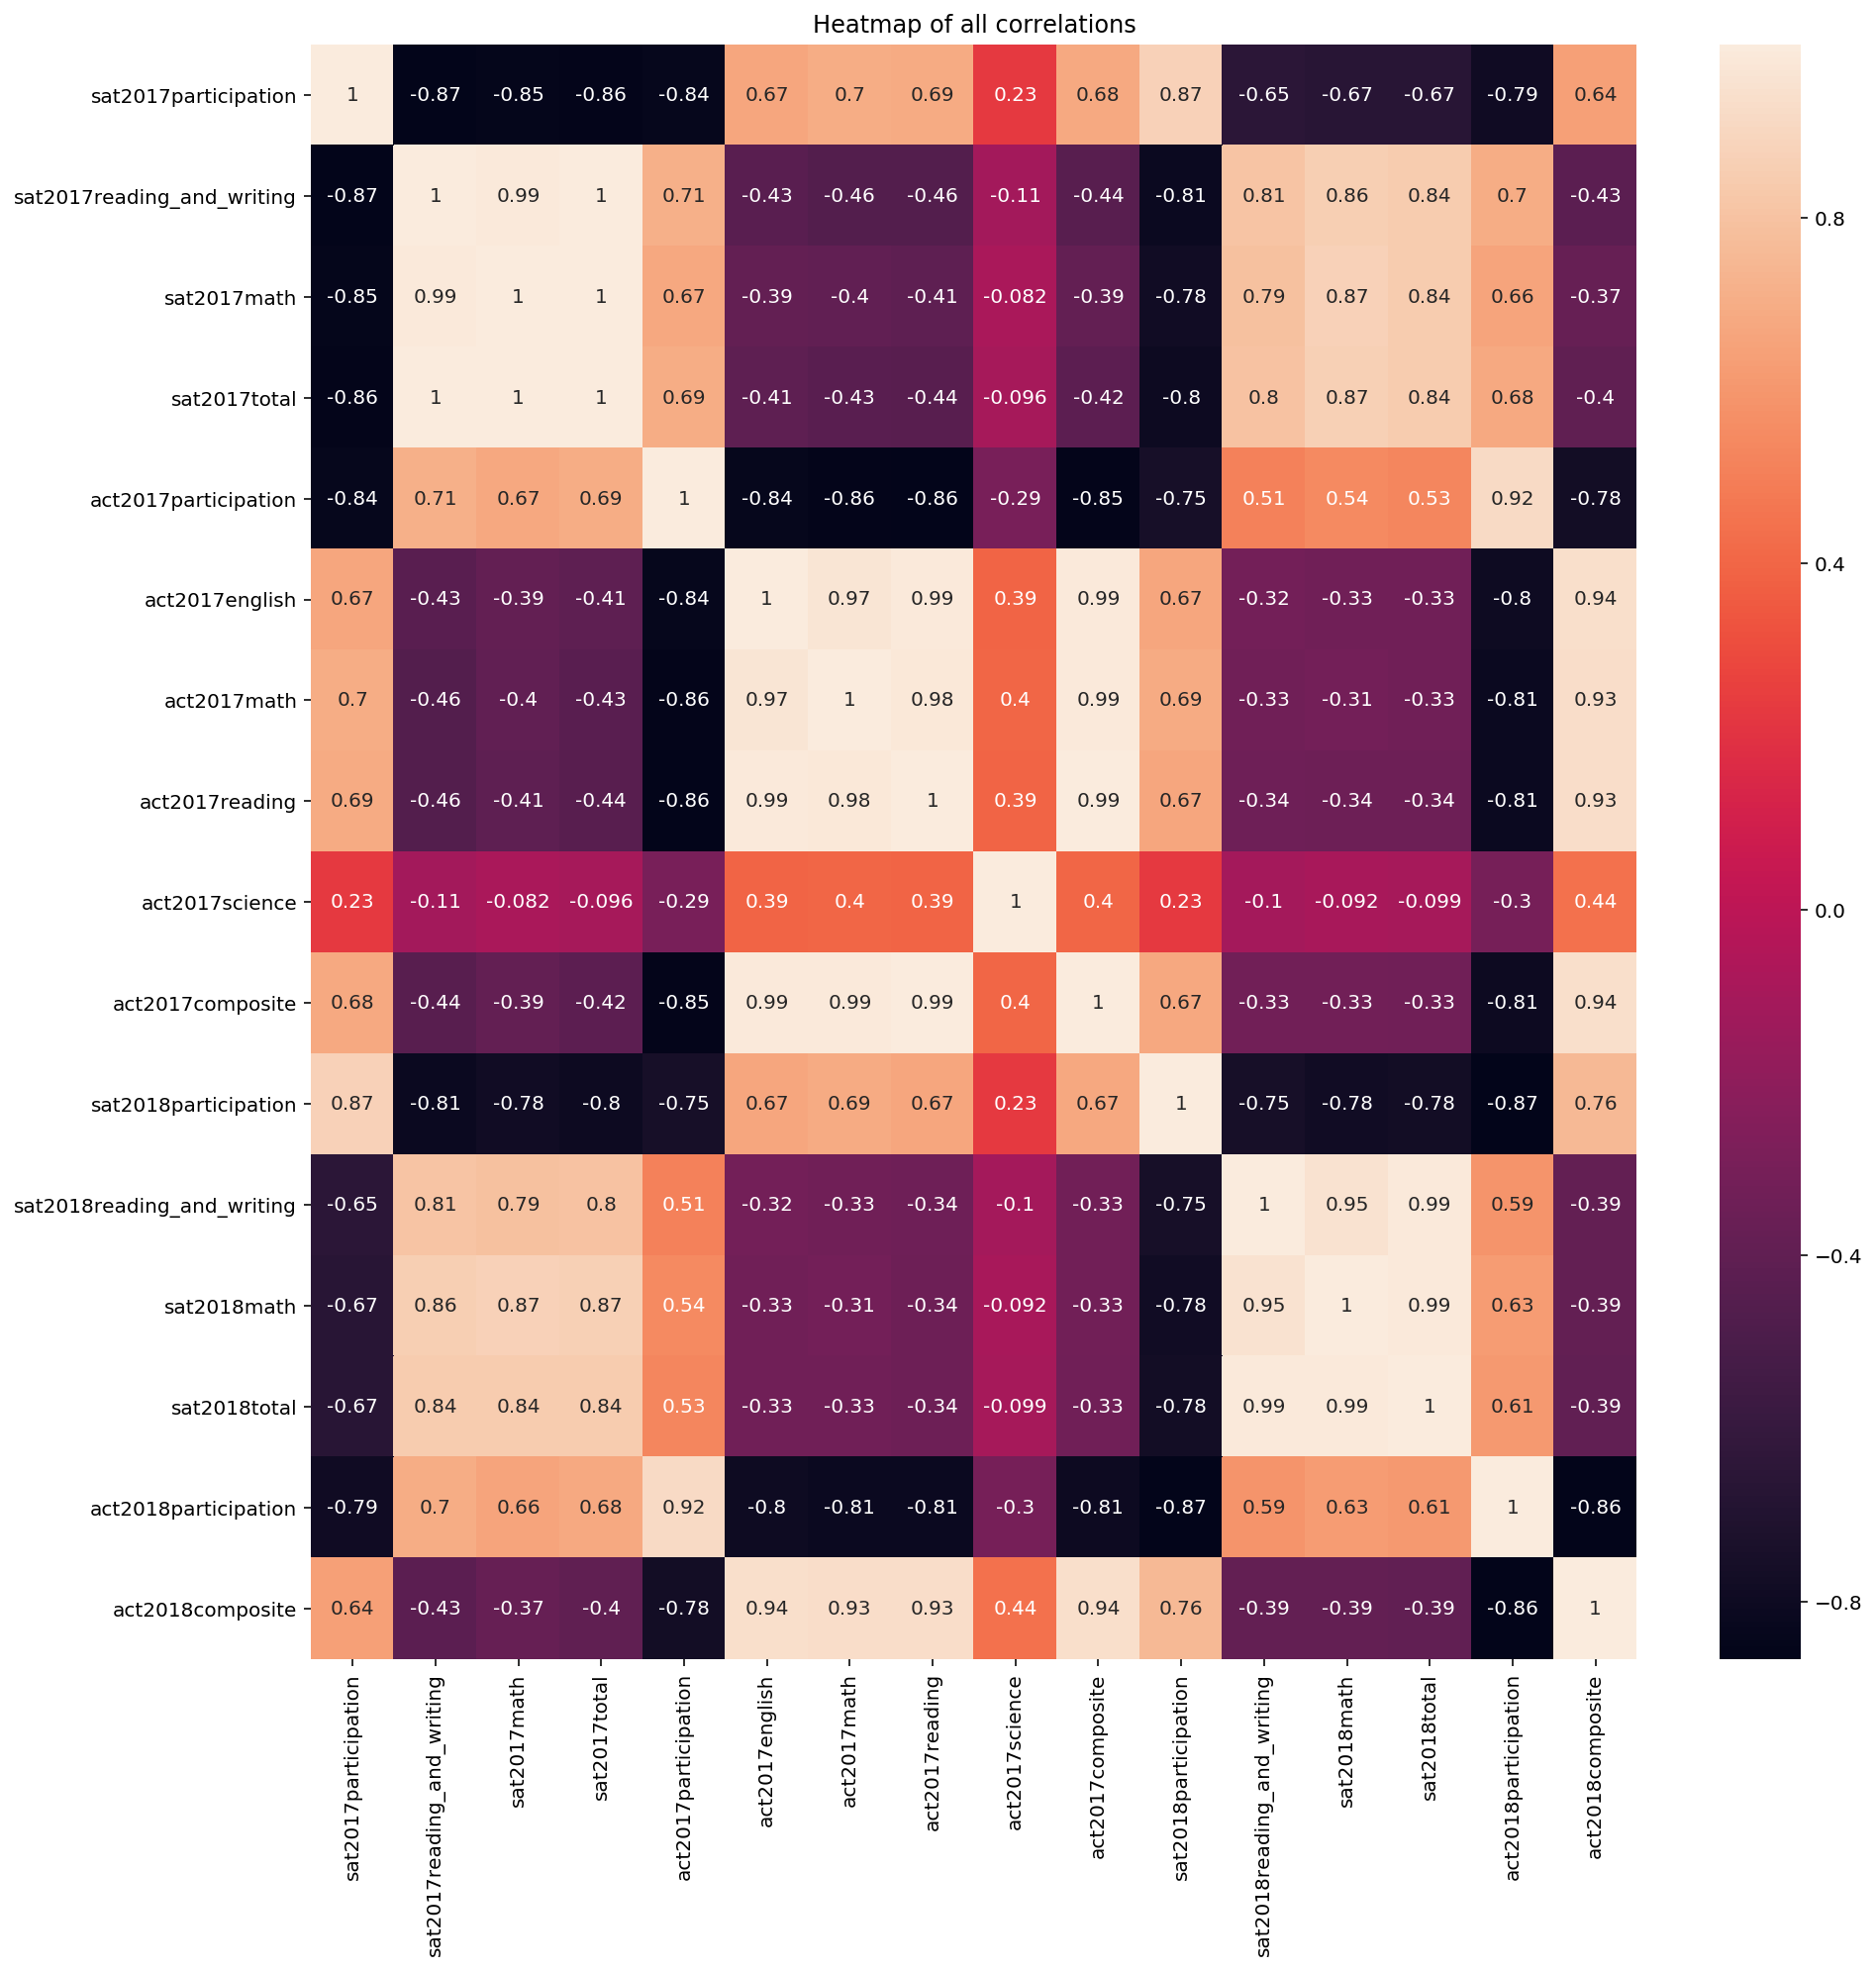

In [86]:
plt.figure(figsize = (15, 15))
ax = plt.axes()
sns.heatmap(df_test_scores_2017_2018.corr(), annot = True)
ax.set_title('Heatmap of all correlations')
plt.show()

In [ ]:
plt.figure(figsize = (10, 10))
plt.barh(df_test_scores_2017_2018['state'], df_test_scores_2017_2018['sat2018participation']) #ascending = True).iloc[[19, 20, 22, 24, 26, 29, 38], [0, 1, -6, 15, 5], align = 'center']


In [ ]:
df_test_scores_2017_2018.sort_values(['sat2018participation'],  ascending = True).iloc[:, [0, 11, 14, 15, 16]].plot(kind = 'bar')


In [ ]:
plt.figure(figsize = (10, 10))
plt.barh([:, [0, 11, 14, 15, 16]],
        df_test_scores_2017_2018['sat2018participation'].value_counts())

figsize = (20, 20)
df_test_scores_2017_2018.sort_values(['state']).iloc[:, [0, 11, 14, 15, 16]].plot(kind = 'bar')

df_test_scores_2017_2018.sort_values(['sat2018participation'], ascending = True).iloc[:, [0, 1, -6, 15, 5]]

df_test_scores_2017_2018.sort_values('Participation', ascending = False)


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [92]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
                
                #I definitely need a one on one about subplots 

SyntaxError: invalid syntax (<ipython-input-92-f8881e15e6cc>, line 3)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

**PARTICIPATION RATE HISTOGRAMS**

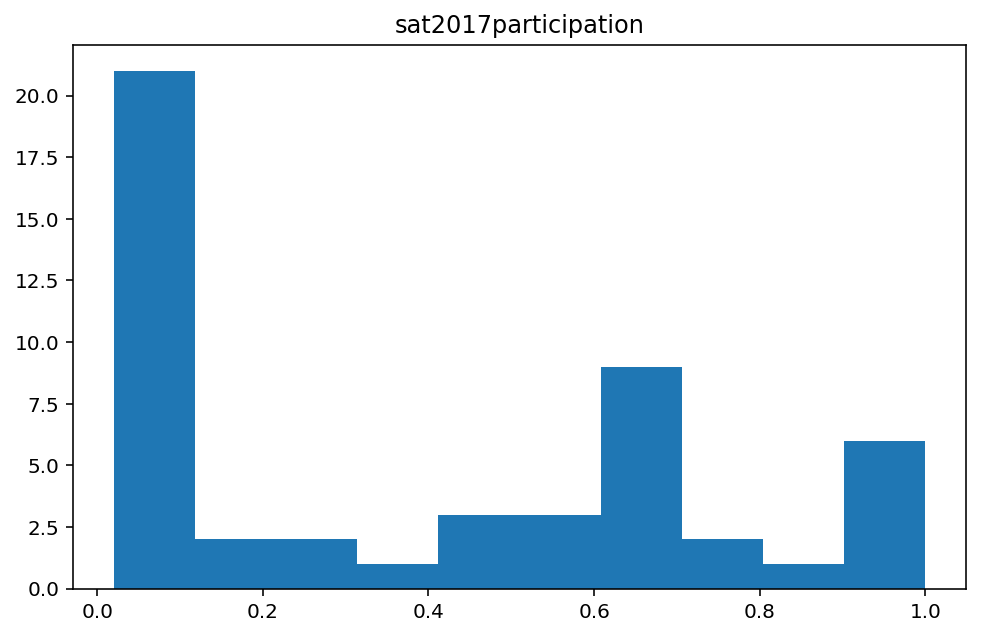

In [113]:
# Code
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['sat2017participation'])
ax.set_title('sat 2017 participation')
plt.show()

#right skewed - a significant number of states (20+) have very low popularity for the SAT.

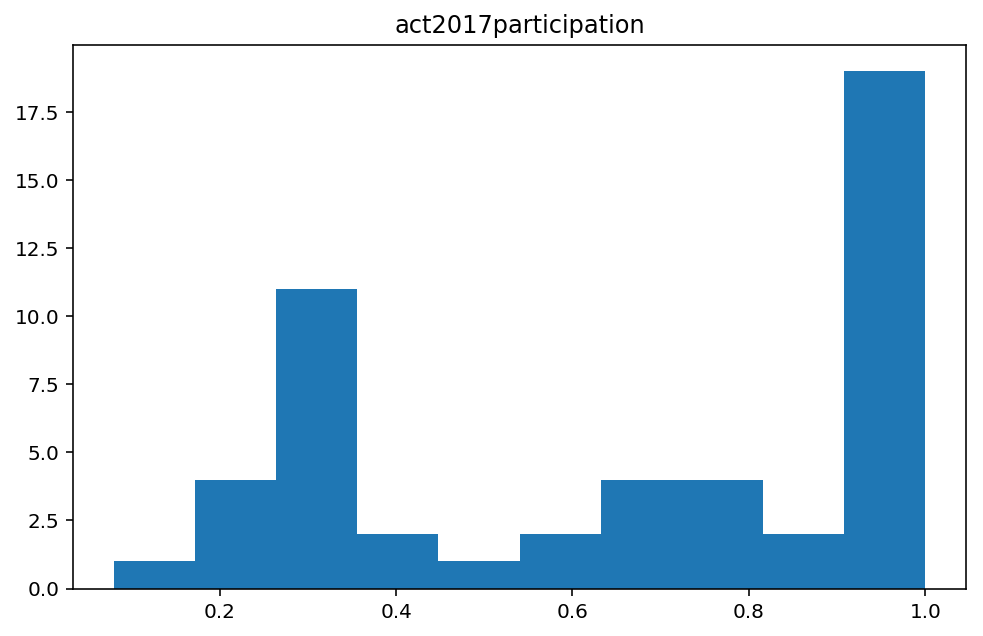

In [88]:
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['act2017participation'])
ax.set_title('act 2017 participation')
plt.show()

#left skewed - most states do not have a state mandate, but at least 18 do.  

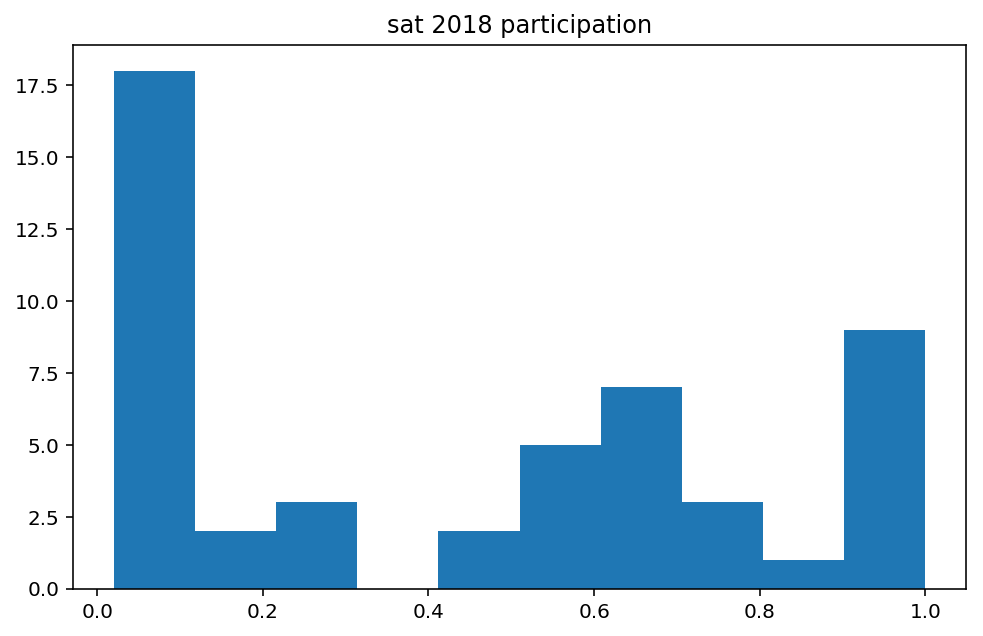

In [123]:
# Code
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['sat2018participation'])
ax.set_title('sat 2018 participation')
plt.show()

#There is now more SAT participation 

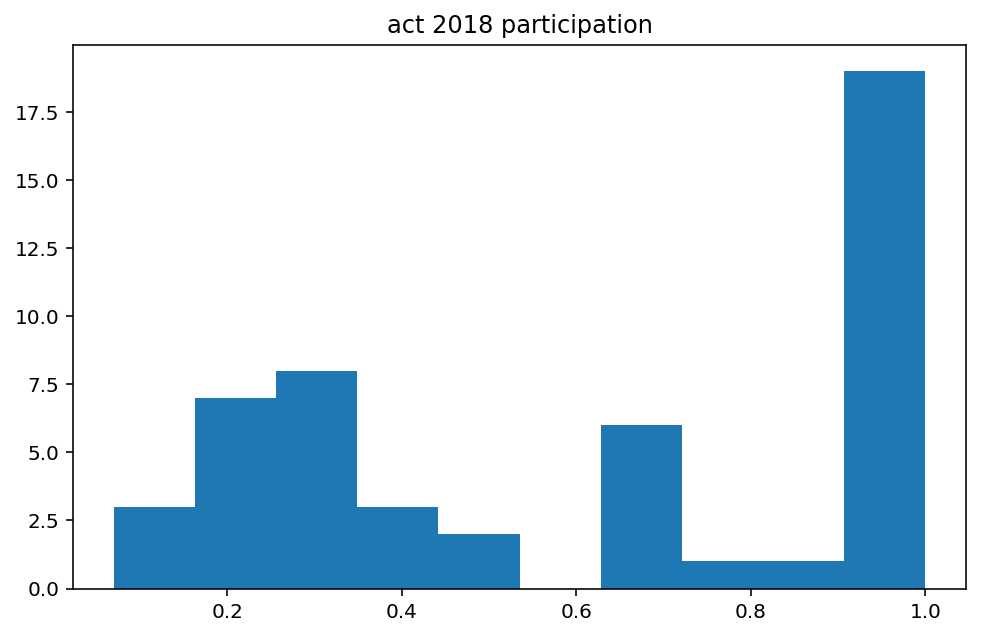

In [125]:
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['act2018participation'])
ax.set_title('act 2018 participation')
plt.show()
#The ACT has experienced minor decline in participation.

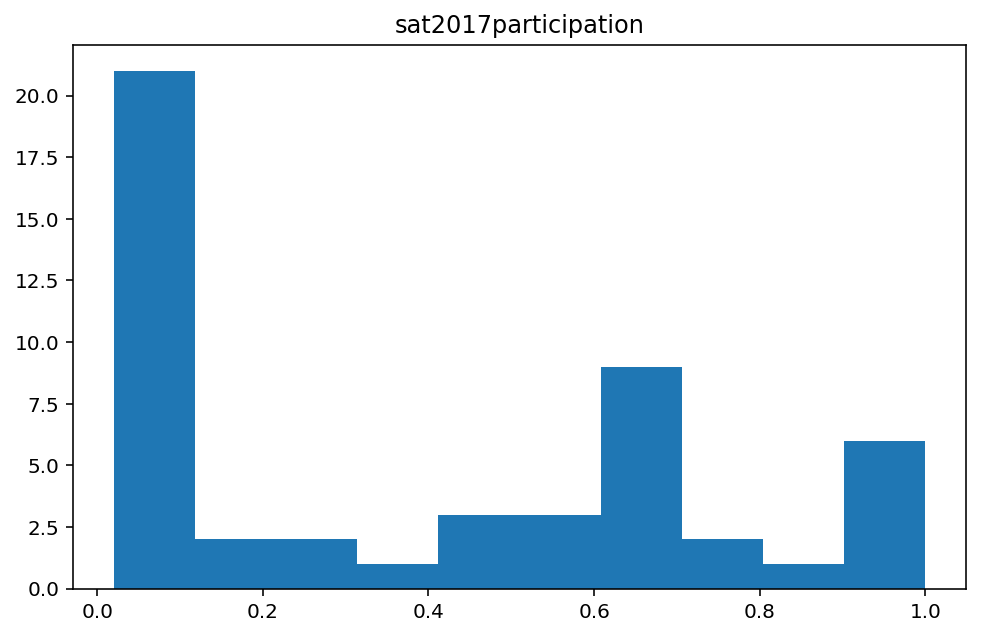

In [121]:
# Code
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['sat2017participation'])
ax.set_title('sat2017participation')
plt.show()

**MATH SCORE HISTOGRAMS**

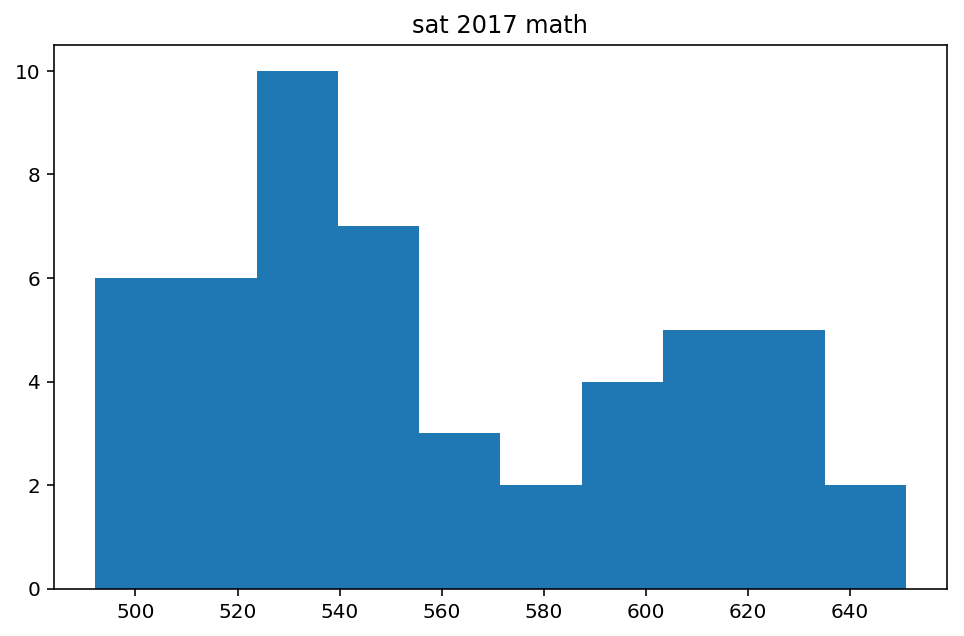

In [126]:
# Code
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['sat2017math'])
ax.set_title('sat 2017 math')
plt.show()

#Not too skewed, but not particularly normal distribution of scores  

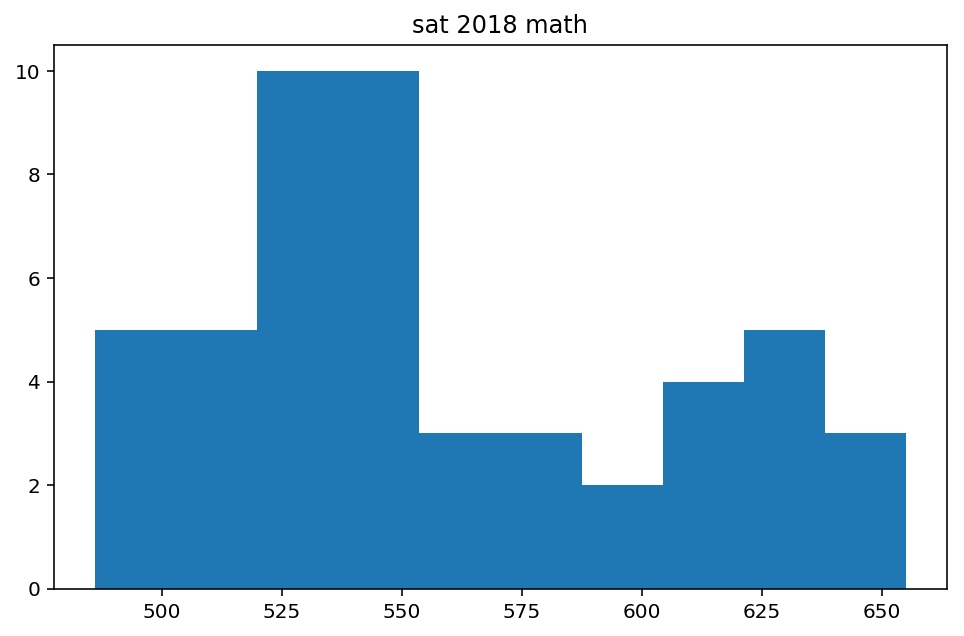

In [127]:
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['sat2018math'])
ax.set_title('sat 2018 math')
plt.show()

#Similar to prior year's distribution, slightly more left skewed as participation has gone up. 

(array([ 3.,  7.,  8.,  3.,  2.,  0.,  6.,  1.,  1., 19.]),
 array([0.07 , 0.163, 0.256, 0.349, 0.442, 0.535, 0.628, 0.721, 0.814,
        0.907, 1.   ]),
 <a list of 10 Patch objects>)

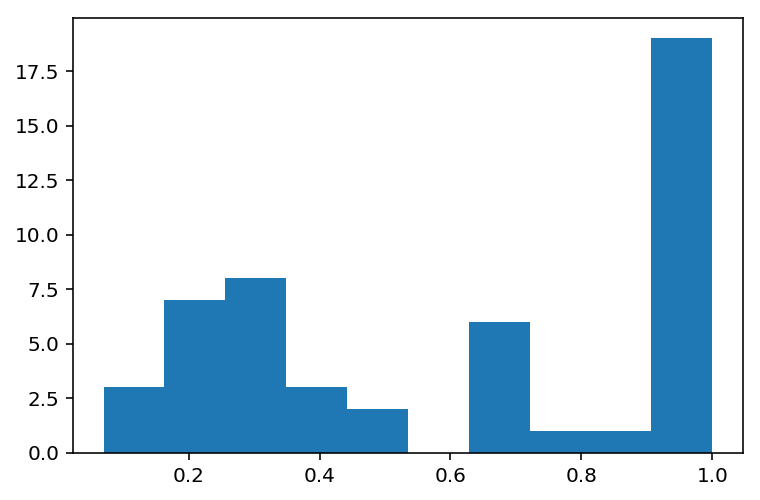

In [90]:
plt.hist(df_test_scores_2017_2018['act2018participation'])

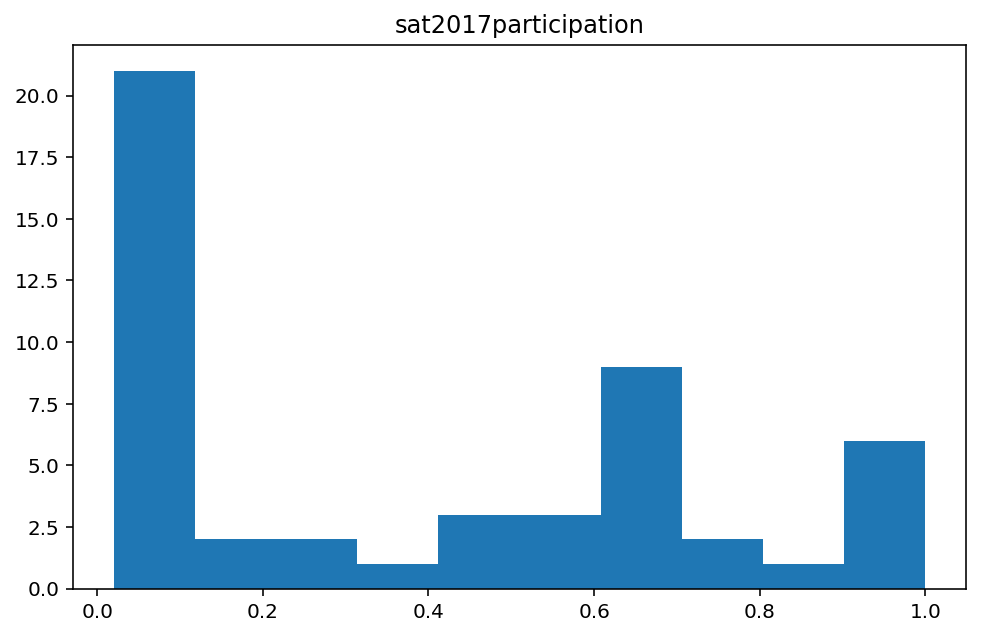

In [116]:
# Code
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['sat2017participation'])
ax.set_title('sat2017participation')
plt.show()

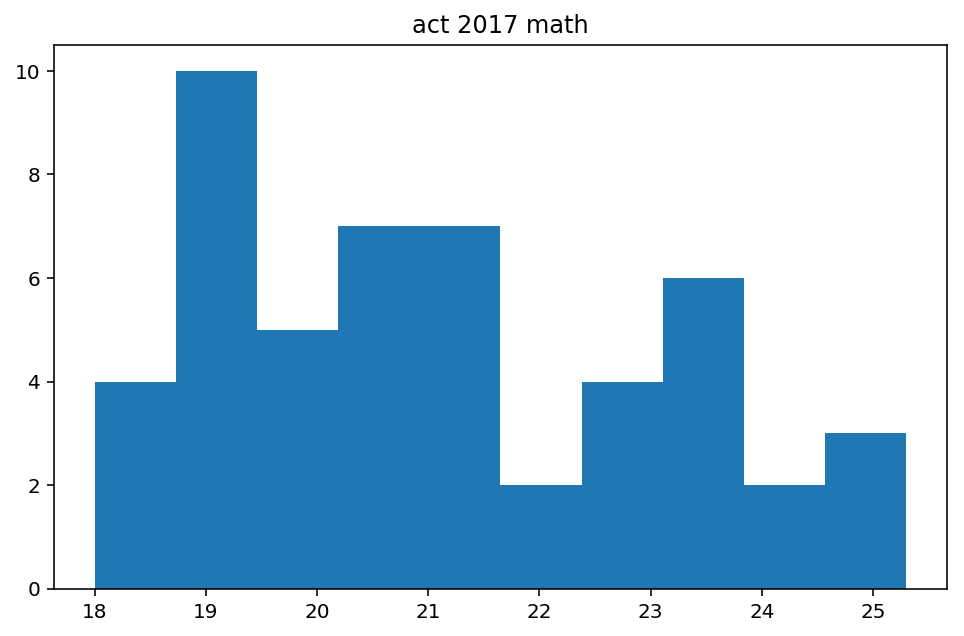

In [130]:
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['act2017math'])
ax.set_title('act 2017 math')
plt.show()


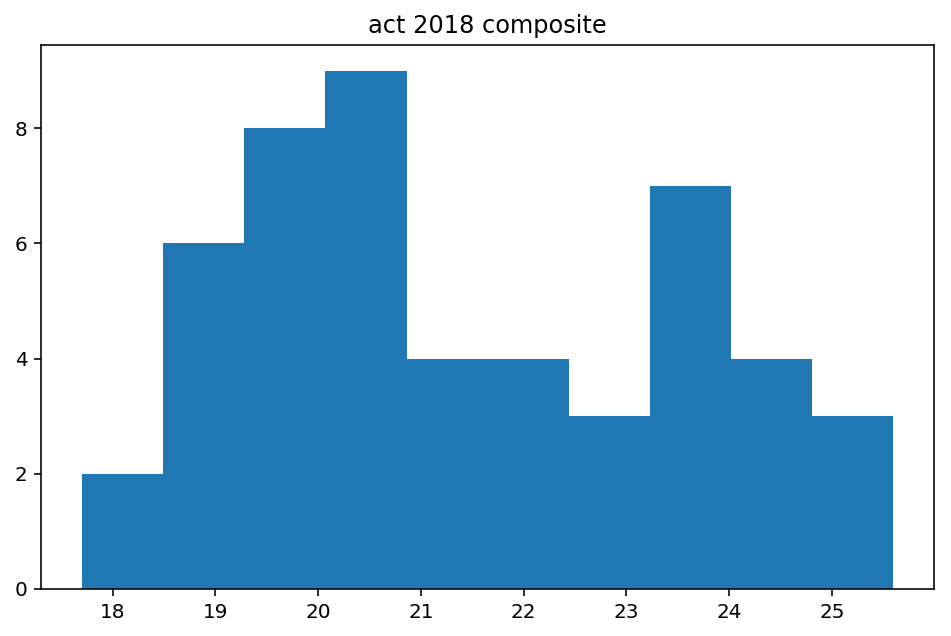

In [134]:
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['act2018composite'])
ax.set_title('act 2018 composite')
plt.show()



There was no data on the sections for the act in 2018, only the composite.


**READING / VERBAL SCORE HISTOGRAMS**

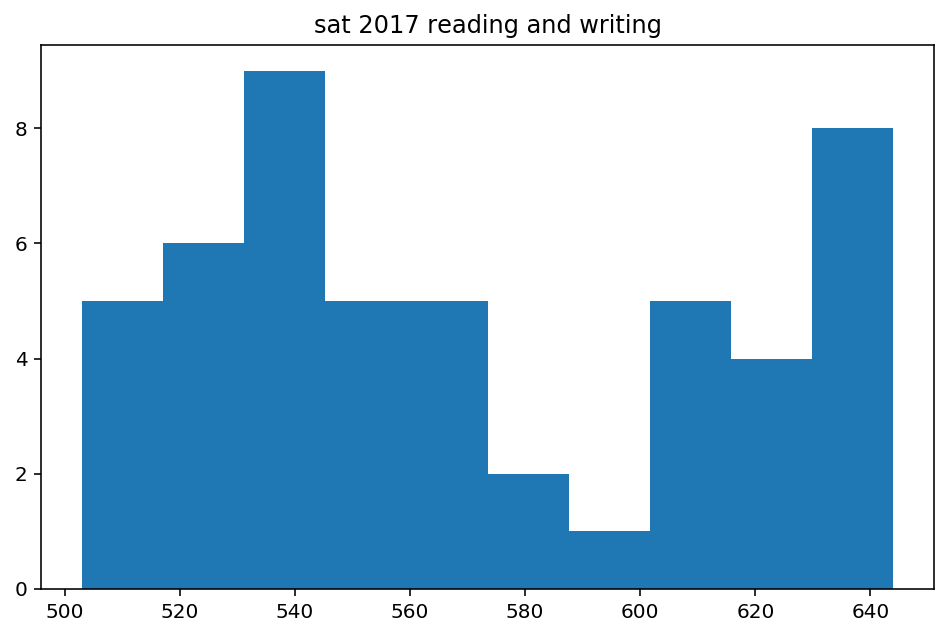

In [136]:
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['sat2017reading_and_writing'])
ax.set_title('sat 2017 reading and writing')
plt.show()

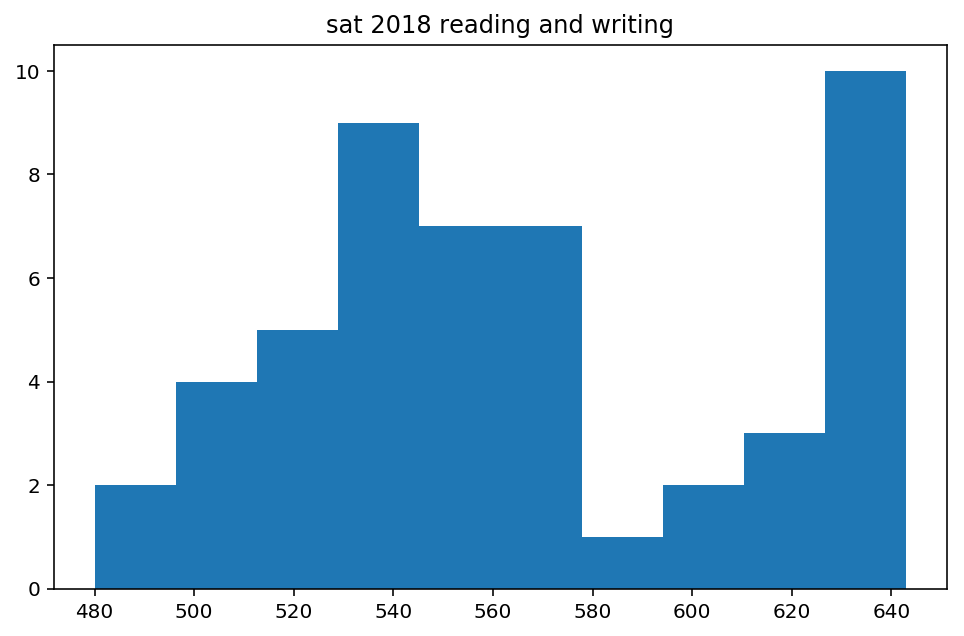

In [139]:
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['sat2018reading_and_writing'])
ax.set_title('sat 2018 reading and writing')
plt.show()

There is a somewhat more normal distribution here than the prior year, with somewhat higher scores in 2018 - probably from students and educators being more used to the new format introduced in 2016.

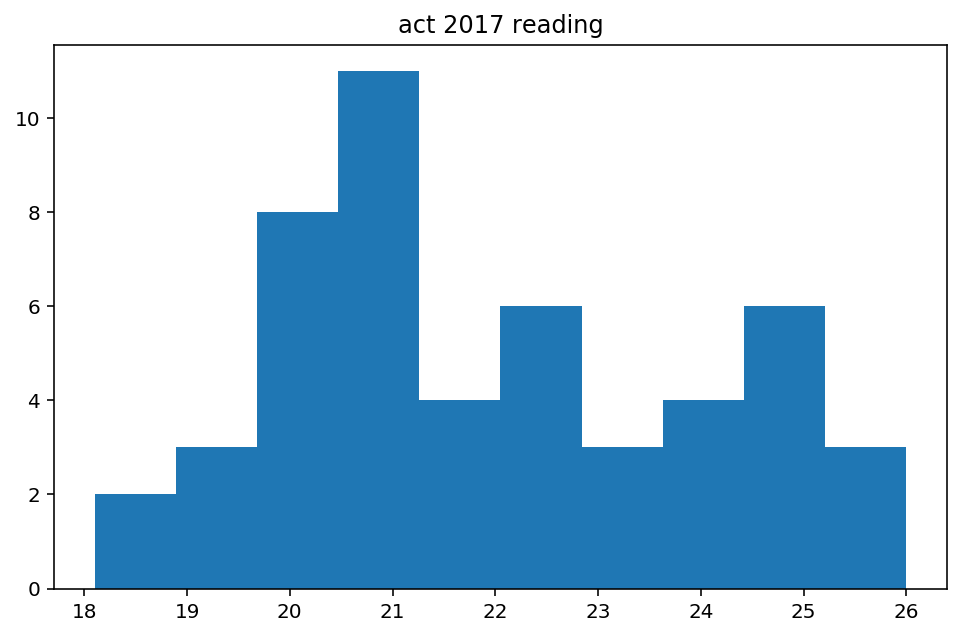

In [141]:
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['act2017reading'])
ax.set_title('act 2017 reading')
plt.show()

NameError: name 'stats' is not defined

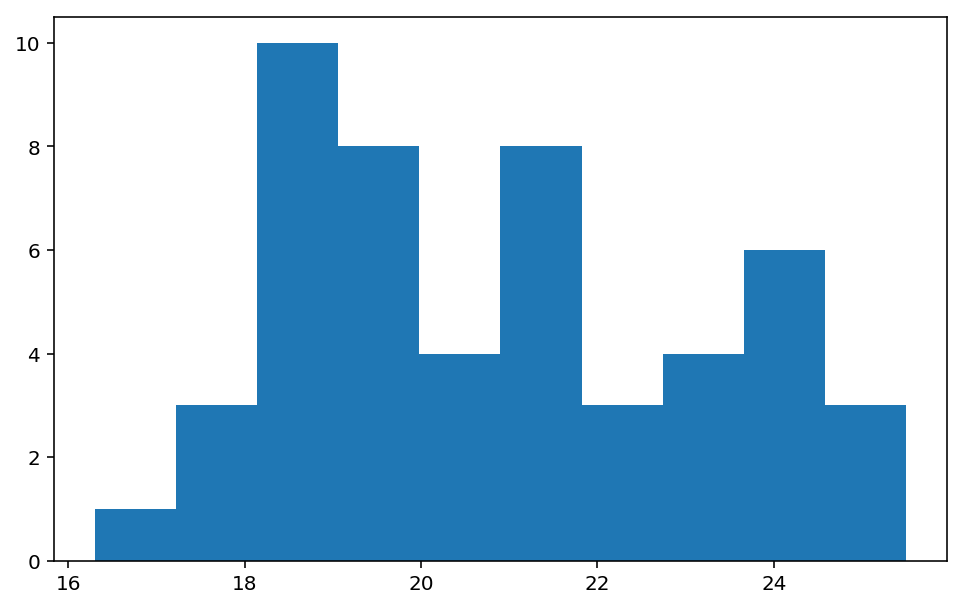

In [208]:
plt.figure(figsize = (8, 5))
ax = plt.axes()
plt.hist(df_test_scores_2017_2018['act2017english'])
ax.set_title('act 2017 english')
plt.show()

These distributions stayed mostly the same. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


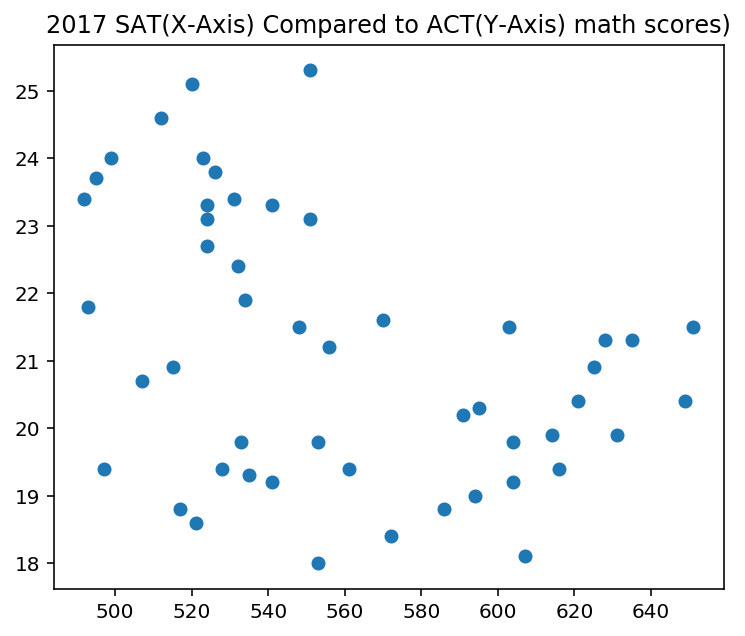

In [183]:
plt.figure(figsize = (6, 5))
ax = plt.axes()
plt.scatter(df_test_scores_2017_2018['sat2017math'], df_test_scores_2017_2018['act2017math'])
ax.set_title('2017 SAT(X-Axis) Compared to ACT(Y-Axis) math scores)')
plt.show()

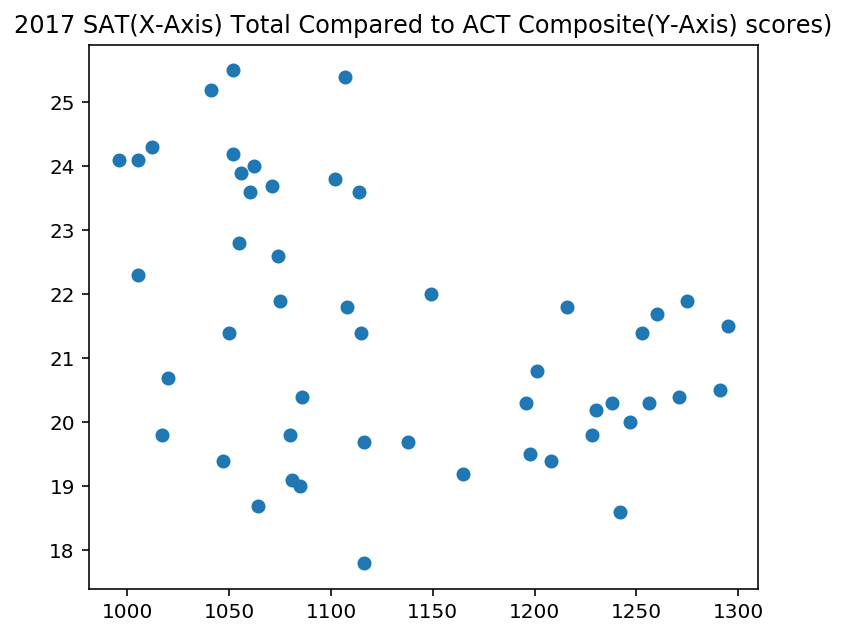

In [184]:
plt.figure(figsize = (6, 5))
ax = plt.axes()
plt.scatter(df_test_scores_2017_2018['sat2017total'], df_test_scores_2017_2018['act2017composite'])
ax.set_title('2017 SAT(X-Axis) Total Compared to ACT Composite(Y-Axis) scores)')
plt.show()

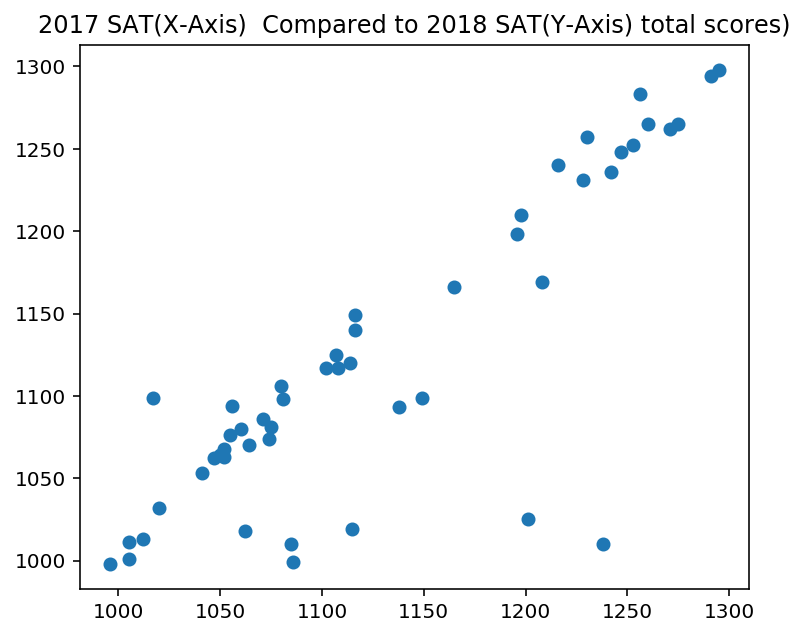

In [185]:
plt.figure(figsize = (6, 5))
ax = plt.axes()
plt.scatter(df_test_scores_2017_2018['sat2017total'], df_test_scores_2017_2018['sat2018total'])
ax.set_title('2017 SAT(X-Axis)  Compared to 2018 SAT(Y-Axis) total scores)')
plt.show()

There is a very obvious positive linear relationship here.

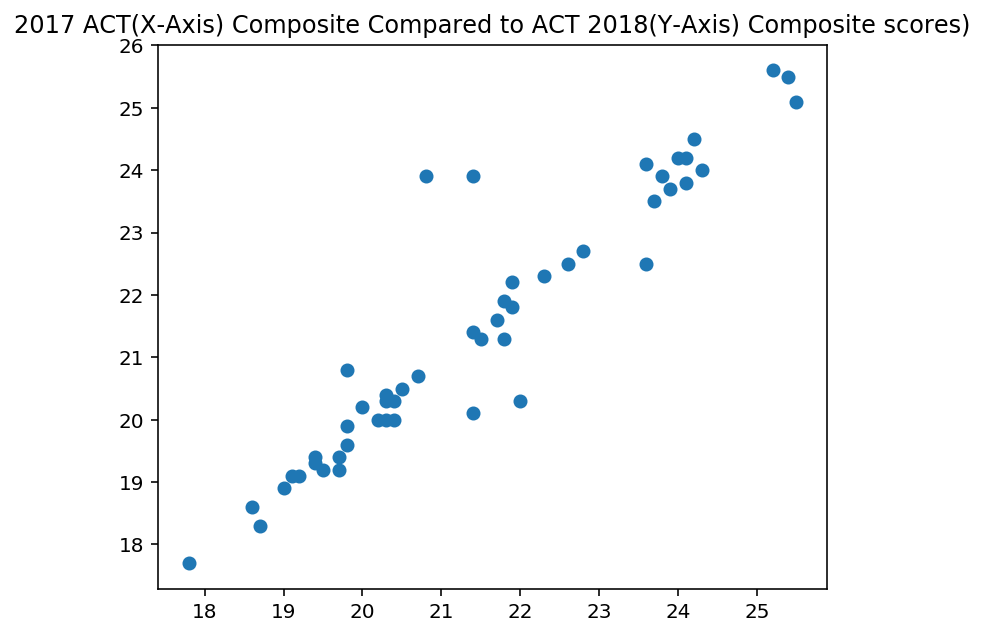

In [188]:
plt.figure(figsize = (6, 5))
ax = plt.axes()
plt.scatter(df_test_scores_2017_2018['act2017composite'], df_test_scores_2017_2018['act2018composite'])
ax.set_title('2017 ACT(X-Axis) Composite Compared to ACT 2018(Y-Axis) Composite scores)')
plt.show()

There is a very obvious positive linear relationship here.

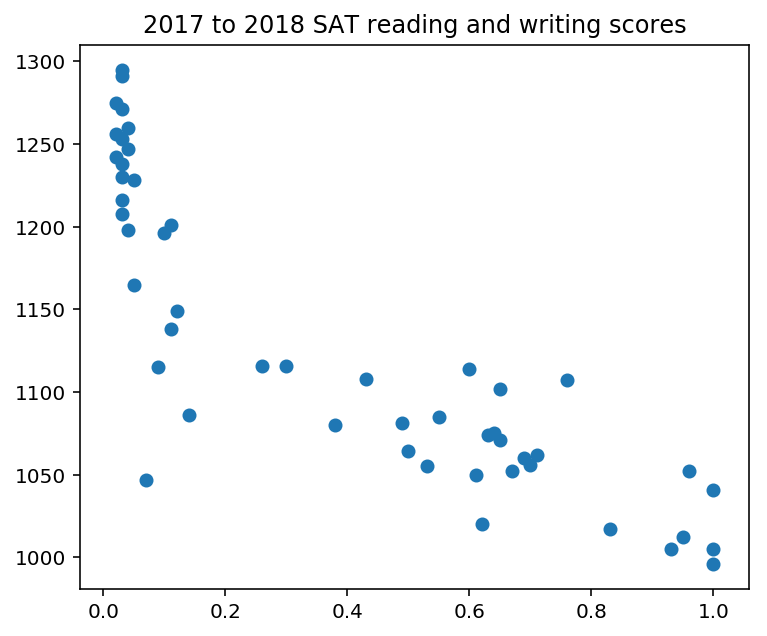

In [186]:
# Code
plt.figure(figsize = (6, 5))
ax = plt.axes()
plt.scatter(df_test_scores_2017_2018['sat2017participation'], df_test_scores_2017_2018['sat2017total'])
ax.set_title('2017 SAT participation (X-axis) compared to 2017 SAT Total Scores (Y-Axis)))')
plt.show()

A very clear negative relatioship that is somewhere between being linear and exponential demonstrates a clear trend of lowered scores as participation goes from extremely uncommon, to mandated within a state. 

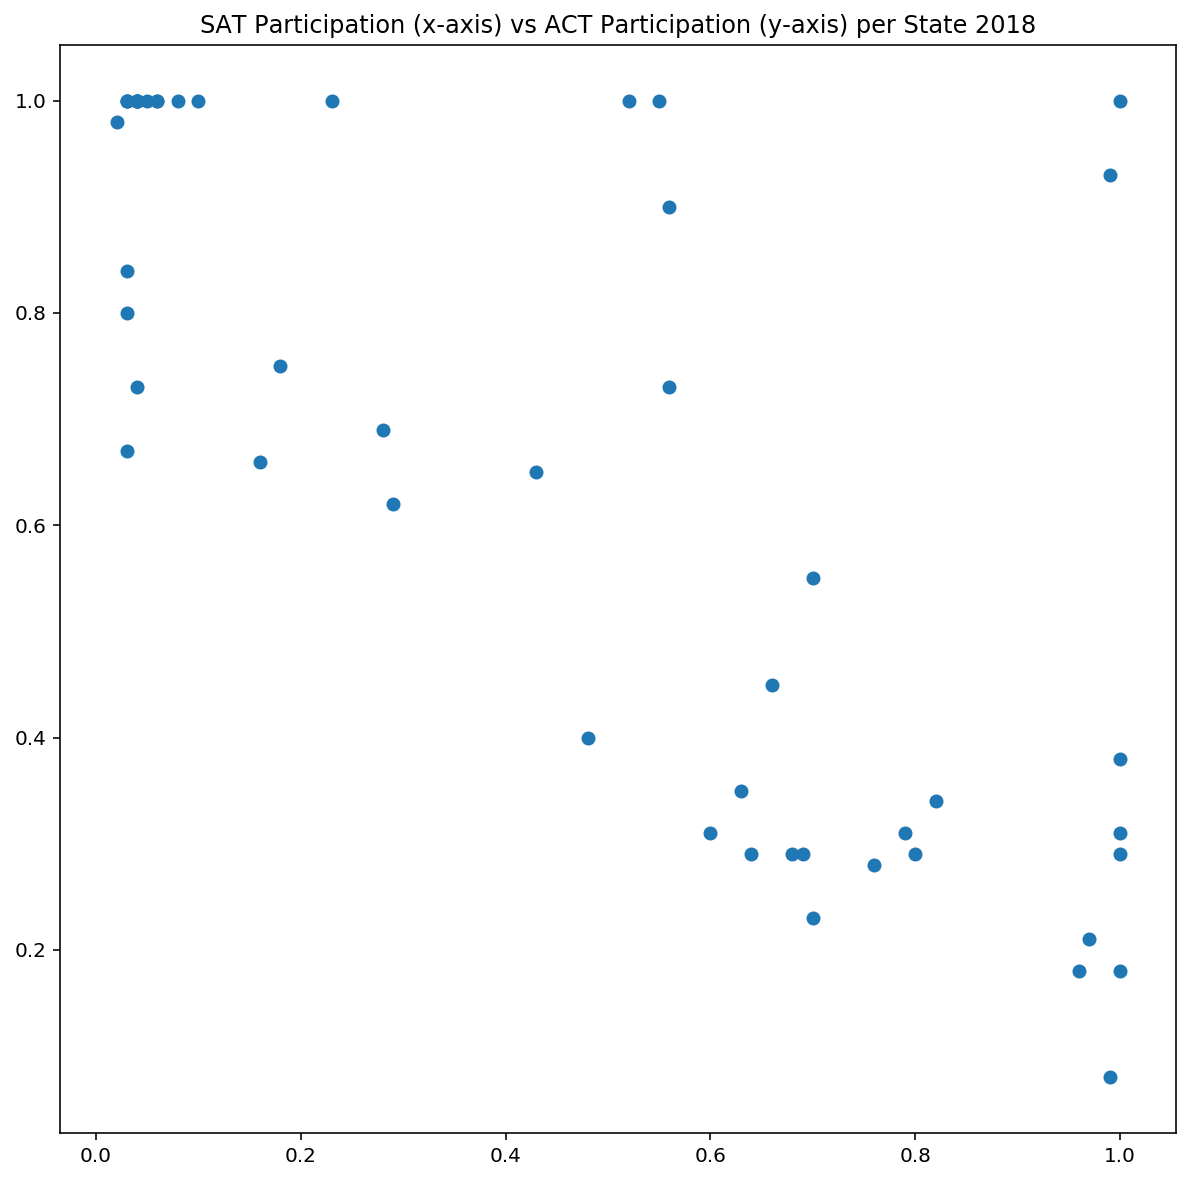

In [207]:
plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(df_test_scores_2017_2018['sat2018participation'], df_test_scores_2017_2018['act2017participation'])
ax.set_title('SAT Participation (x-axis) vs ACT Participation (y-axis) per State 2018')
plt.show()

A very weak negative relationship seems apparent.

In [200]:
#df_test_scores_2017_2018.groupby('state')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

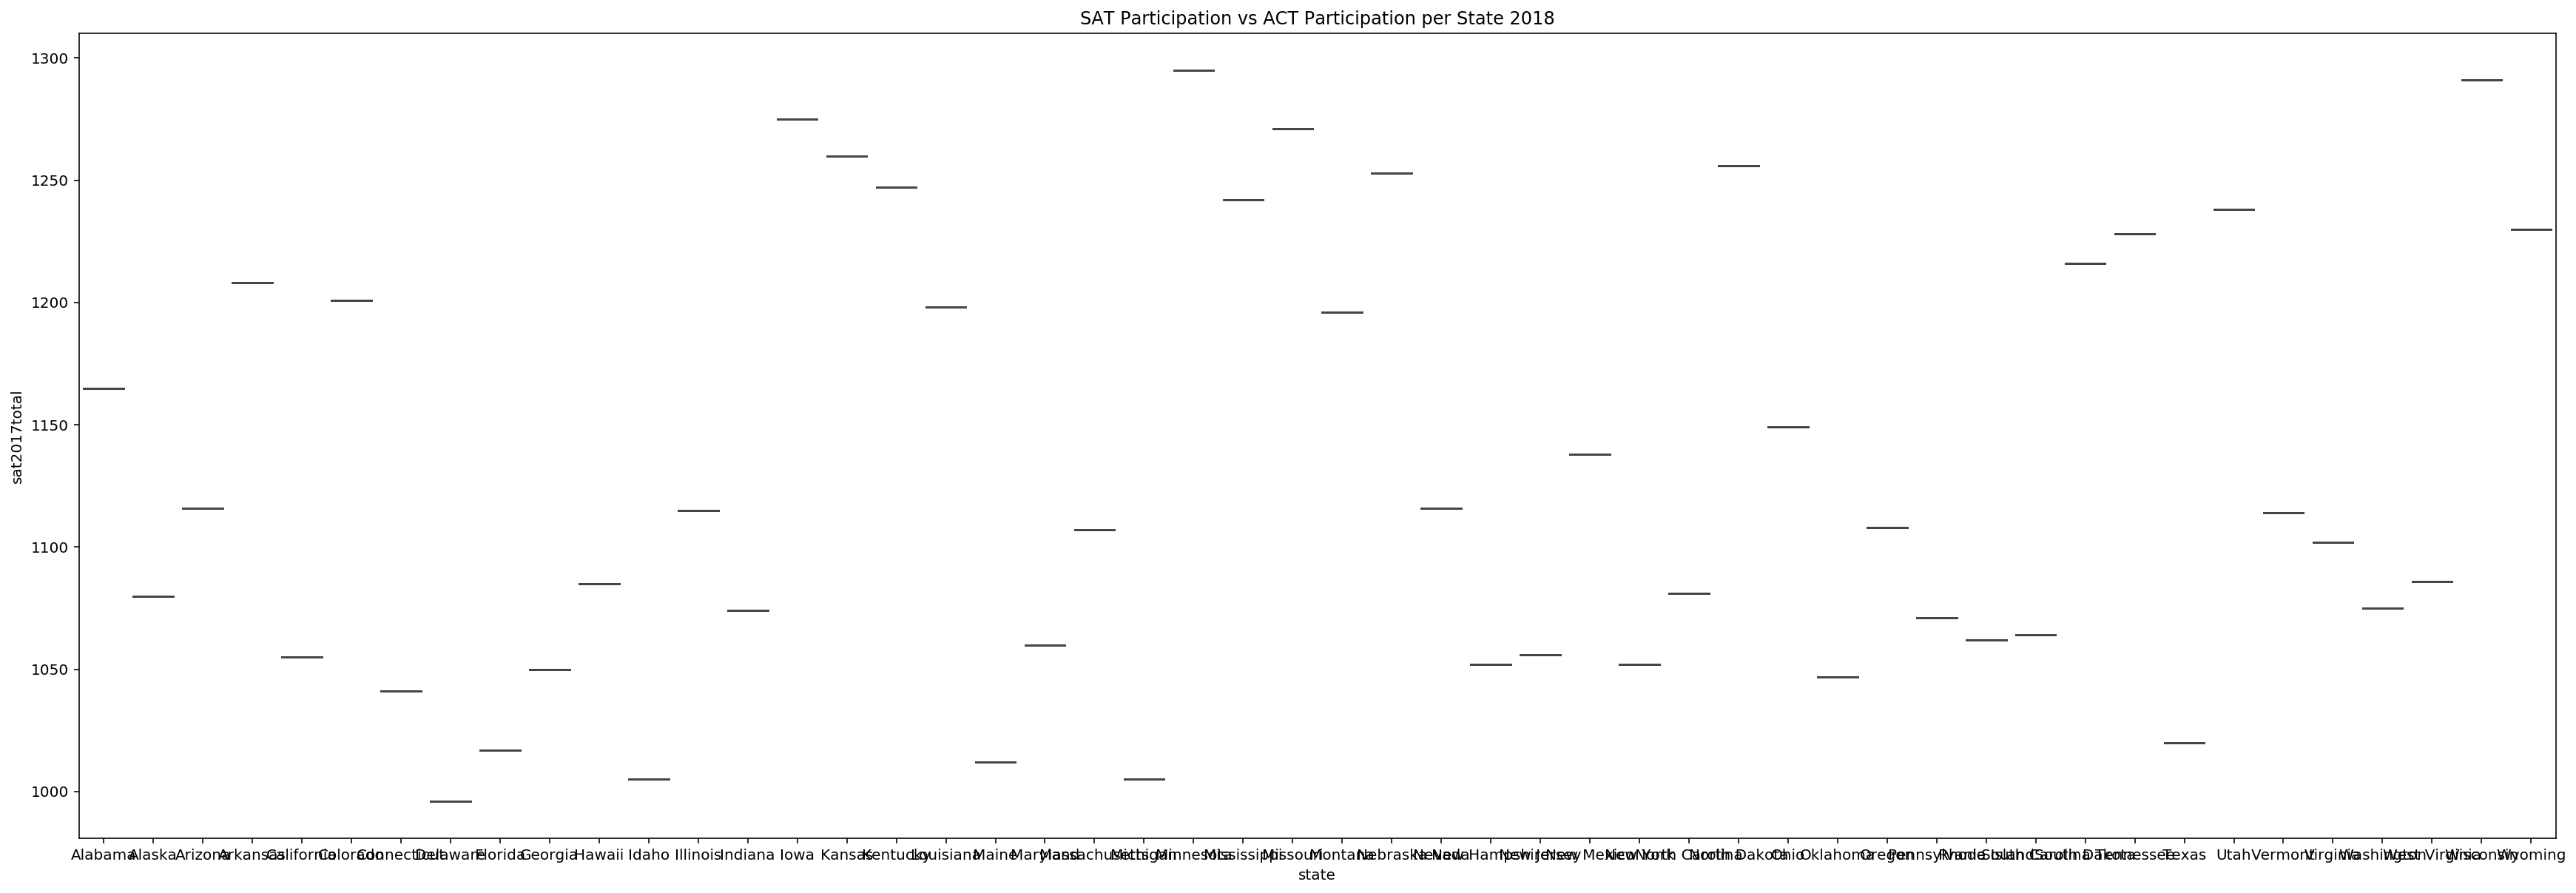

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [ ]:
# Code
#plt.figure(figsize = (30, 10))
#ax = plt.axes()
#sns.boxplot(x = df_test_scores_2017_2018['state'], y = df_test_scores_2017_2018['sat2017total'])
#ax.set_title('SAT Participation vs ACT Participation per State 2018')
#plt.show()
#Made this bar plot work below via methods

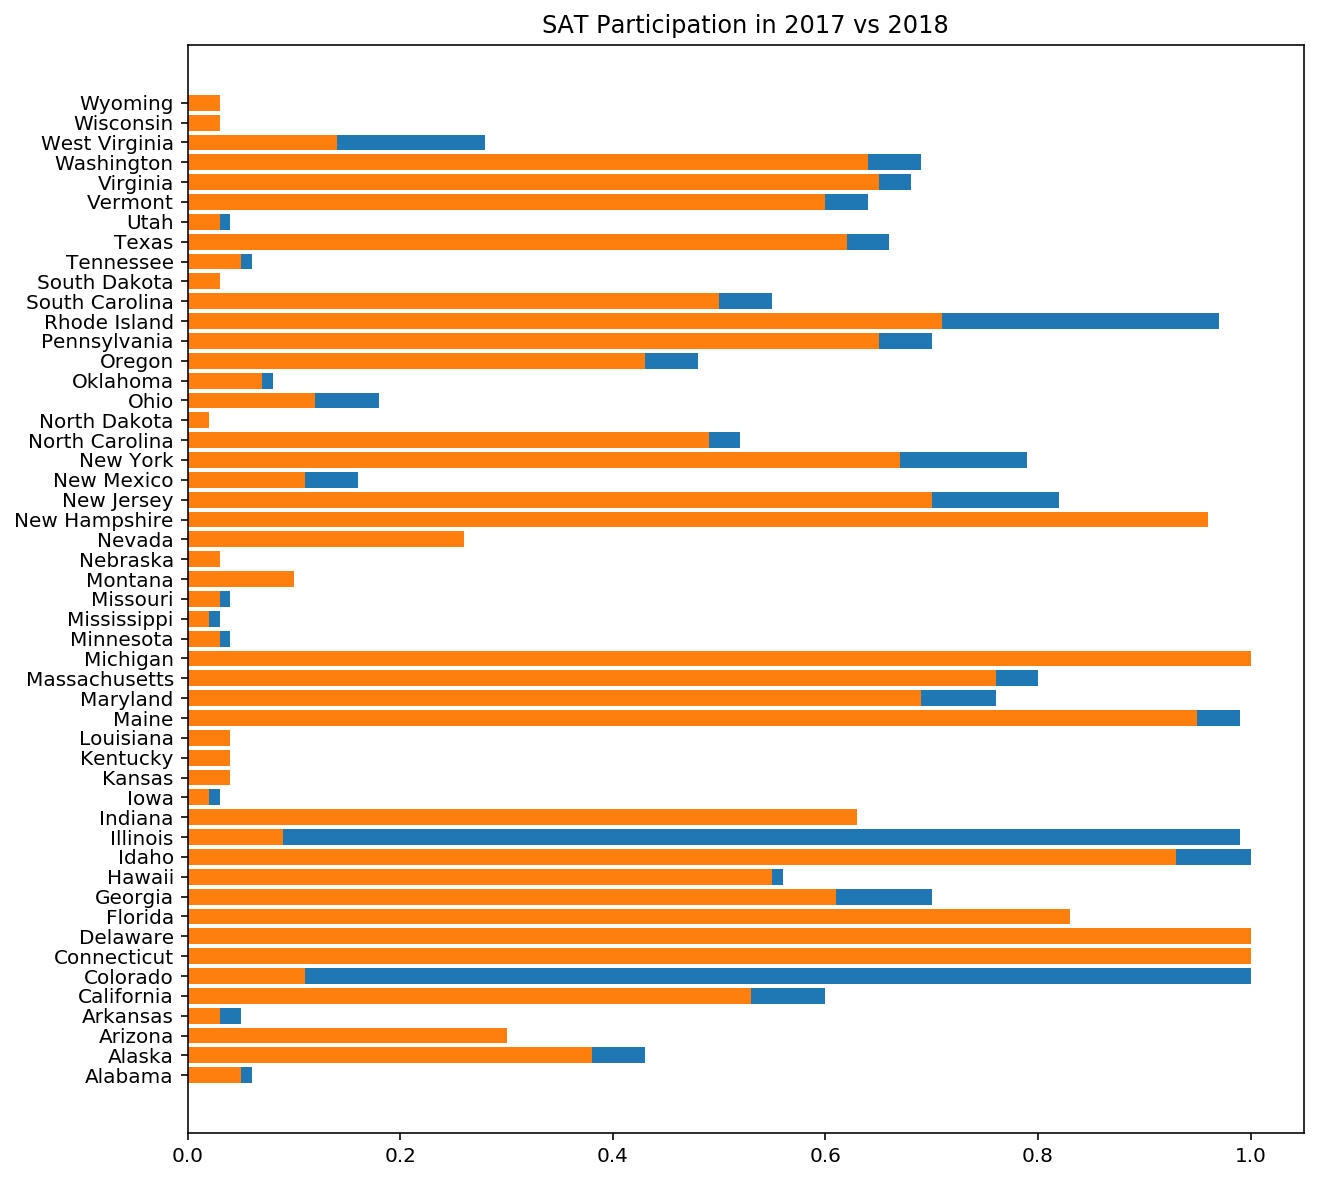

In [201]:
plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.barh(df_test_scores_2017_2018.state, df_test_scores_2017_2018.sat2018participation)
plt.barh(df_test_scores_2017_2018.state, df_test_scores_2017_2018.sat2017participation)
ax.set_title('SAT Participation in 2017 (Orange) vs 2018 (Blue)')
plt.show()

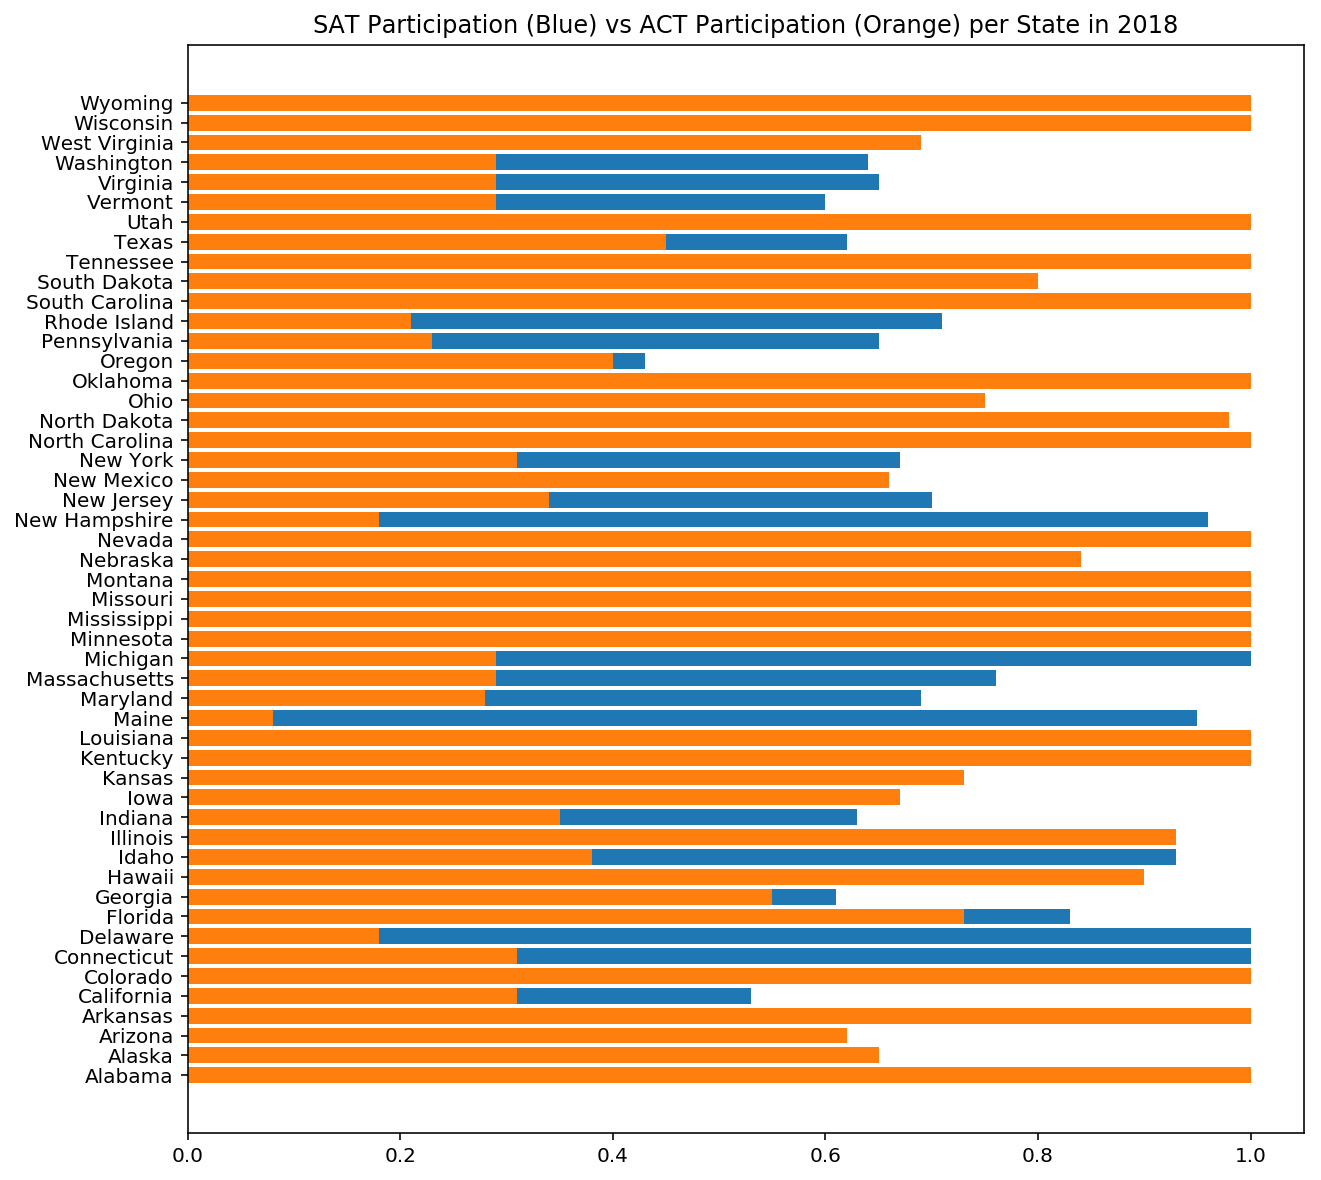

In [204]:
plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.barh(df_test_scores_2017_2018.state, df_test_scores_2017_2018.sat2017participation)
plt.barh(df_test_scores_2017_2018.state, df_test_scores_2017_2018.act2017participation)
ax.set_title('SAT Participation (Blue) vs ACT Participation (Orange) per State in 2018')
plt.show()

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: At times somewhat, but not particularly.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: The math and reading sections are not super skewed, however they are not quite normal distributions either.  The participation rates are fairly skewed, as the SAT and ACT have polarized, uneven participant rates that vary state by state.  This is a combined set of factors including local popularity and acclimitazation of studying resources around one test or another, through both naturalistic as well as legislative means - such as state and regional mandation and subsidies for one or both exams.  



#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: As per our histograms, correlations, and scatterplots, as well as conducting a regression analysis, we can determine a weak negative relationship between the two variables.  Precise quantitative data on this relationship, however, is extremely skewed and outright unreliable by the reality that None of the states value are weighted by their population of students - Iowa has the same weight as California, which makes no sense as California has over ten times the population of Iowa.  

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: Again some relationships can be inferred, however, until population data is factored into this to give each state representational weight, all the inferential analysis associated with this data is Not Reliable.  

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research



Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

http://worldpopulationreview.com/states/ Population per state and 
https://forms.llcc.edu/Environmental-Scan/2016/Demographics/2014_Demographics_Projections.pdf Projected population of graduating students from 2014-2024 in each state, data that is erroneously missing from our Dataframe, preventing us from making more significant conclusions on our research questions, and a source of a lot of the skew in our Dataframe which is atypical of population level data.

#https://blog.prepscholar.com/act-vs-sat

https://www.studyusa.com/en/a/1305/act-vs-sat-ultimate-guide-to-choosing-the-right-test - Article comparing both exams, in light of the fact that the SAT was reformed again in 2016 and as of now the exams resemble one another more so than ever before. 

https://www.cde.ca.gov/ds/sp/ai/whatissat.asp - California Dept of Ed data on SAT and related exams in the State of California. 

https://reports.collegeboard.org/pdf/2017-new-york-sat-suite-assessments-annual-report.pdf - NY SAT suite assessments annual report - data on SAT and related exams in New York state. 

https://www.cde.state.co.us/assessment/coloradosat - Information on data regarding the SAT and ACT in Colorado, and recent changes caused by Colorado mandation of the SAT. 




## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

My primary strategy is to target lower participating states with promotion of voluntary, rather than mandated exams in key high population (urban and metropolitan area) districts, at least initially.  The reason why is that in low participation states, there are almost always artifically high scores typically, which we can assume is generated from minority participant students who stray away from their state's standard (by popularity or mandate) of the ACT being significantly more prepared than the general body of students, epecially those who take one of the exams by mandate and are disinterested in the college application process or are simply unprepared at the time of the exam.  These artifically high scored can be used as part of marketing materials in these low participation states to demonstrate to students that they may perform significantly better on the SAT than the ACT, as per their peer's above average performance, and taking the SAT or both exams can very well give them the competitive edge they need to enter their preferred schools.

States that have room for higher participation include Ohio, New York, California, New Jersey, Texas, Oregon, Georgia,  Washington, Maryland, and Alaska.  States like Colorado, Illinois, and Rhode Island are of LEAST INTEREST becacuse they have already instated statewide mandates of the SAT.

The first five states are particularly of interest because of their high populations - much of this data means very little without the student population data I included in my outside research.  Much of our data is heavily skewed by comparing state's without weighting their populations, and more meaningful research cannot be conducted without considering the population of students.